# Telecome Churn Case Study

In [638]:
# Importing all the required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

## Importing datasets and overview

In [639]:
# Reading the train and test datasets
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# viewing datasets shape
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 172)
Test df shape:  (30000, 171)


In [640]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [641]:
test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

## Data Cleaning

In [642]:
# Viewing percentage wise null values
data.isnull().sum()/(len(data.index))*100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

#### Extracting business related important features and imputing them first

In [643]:
# All the recharge variables
rech_cols = []
for i in data.columns:
    if 'rech' in i and data[i].dtypes != np.object:
        rech_cols.append(i)
print('Business related important features')
rech_cols

Business related important features


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [644]:
# checking null values in recharge columns on test df
data[rech_cols].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
total_rech_data_6     52431
total_rech_data_7     52134
total_rech_data_8     51582
max_rech_data_6       52431
max_rech_data_7       52134
max_rech_data_8       51582
count_rech_2g_6       52431
count_rech_2g_7       52134
count_rech_2g_8       51582
count_rech_3g_6       52431
count_rech_3g_7       52134
count_rech_3g_8       51582
av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
av_rech_amt_data_8    51582
dtype: int64

In [645]:
## Inputing all the recharge related variables' missing values with 0 means, no recahrge has been made by the customer
col = []

# Train dataset
for i in data[rech_cols].columns:
    if data[i].isnull().sum() > 0:
        data[i] = data[i].fillna(0)
        col.append(i)
        
print('columns to be filled with 0 in test: ', col)

columns to be filled with 0 in test:  ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [646]:
# Repeating the above step in test dataset
test[rech_cols].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
total_rech_data_6     22415
total_rech_data_7     22294
total_rech_data_8     22078
max_rech_data_6       22415
max_rech_data_7       22294
max_rech_data_8       22078
count_rech_2g_6       22415
count_rech_2g_7       22294
count_rech_2g_8       22078
count_rech_3g_6       22415
count_rech_3g_7       22294
count_rech_3g_8       22078
av_rech_amt_data_6    22415
av_rech_amt_data_7    22294
av_rech_amt_data_8    22078
dtype: int64

In [647]:
# Test dataset

for i in col:
    if test[i].isnull().sum() > 0:
        test[i] = test[i].fillna(0)
test[rech_cols].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [648]:
# Let's check the null values again in train df
data.isnull().sum()/(len(data.index))*100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

We have fb_user_k variable with 74% missing values. Here missing values means that the user is not using FB. We can drop these variables as not much useful

In [649]:
# delete fb in train and test both
for i in data.columns:
    if 'fb' in i:
        if data[i].isnull().sum()>0:
            print('Dropping : ', i)
            data = data.drop(columns = [i]) # dropping from train data
            test = test.drop(columns = [i])# dropping from test data

Dropping :  fb_user_6
Dropping :  fb_user_7
Dropping :  fb_user_8


In [650]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 169)
Test df shape:  (30000, 168)


#### Again checking the missing values

In [651]:
data.isnull().sum()*100/len(data.index)

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

**As we have so many variables with mising values and it can be seen that all are somewhat important. We'll use these to derive some new features and impute the missing values with 0.**

In [652]:
col = []

for i in data.columns:
    if data[i].isnull().sum() > 0:
        data[i] = data[i].fillna(0)
        test[i] = test[i].fillna(0)
        col.append(i)
col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou

In [653]:
# checking the null values again in train df
data.isnull().sum()*100/len(data.index)

id                          0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t

In [654]:
# checking the null values in test df
test.isnull().sum()*100/len(data.index)

id                          0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t

**Deleting date columns**

In [655]:
# separating out date columns
date_col = data.loc[:, data.dtypes == np.object].columns

In [656]:
# Dropping all the date columns as they are of no use

# train data set
data = data.drop(columns= date_col)

# test data set
test = test.drop(columns= date_col)

In [657]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 160)
Test df shape:  (30000, 159)


In [658]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0   0        109             0.0             0.0             0.0   31.277   
1   1        109             0.0             0.0             0.0    0.000   
2   2        109             0.0             0.0             0.0   60.806   
3   3        109             0.0             0.0             0.0  156.362   
4   4        109             0.0             0.0             0.0  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              1.01             18.75             80.61               0.0   
1              0.00              0.00              0.00               0.0   
2              0.00             28.94             82.05               0.0   
3              0.00             15.33             25.93               4.6   
4              0.00              4.35   

In [659]:
test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0  69999        109             0.0             0.0             0.0   91.882   
1  70000        109             0.0             0.0             0.0  414.168   
2  70001        109             0.0             0.0             0.0  329.844   
3  70002        109             0.0             0.0             0.0   43.550   
4  70003        109             0.0             0.0             0.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              2.05             42.03              7.68             26.43   
1              0.00              0.00             23.76             17.68   
2              0.00              0.00              0.00              0.00   
3              0.00             37.09             94.36              0.00   
4            686.11      

**dropping circle_id and id**

In [660]:
# train
data = data.drop(columns=['id', 'circle_id'])

#test
test = test.drop(columns=['id', 'circle_id'])

In [661]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 158)
Test df shape:  (30000, 157)


#### Derive new columns

In [662]:
print(list(data.columns))

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [663]:
data.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   31.277   87.009    7.527   
1             0.0             0.0             0.0    0.000  122.787   42.953   
2             0.0             0.0             0.0   60.806  103.176    0.000   
3             0.0             0.0             0.0  156.362  205.260  111.095   
4             0.0             0.0             0.0  240.708  128.191  101.565   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        48.58       124.38         1.29         32.24         96.68   
1         0.00         0.00         0.00          0.00         25.99   
2         0.53        15.93         0.00         53.99         82.05   
3         7.26        16.01         0.00         68.76         78.48   
4        21.28         4.83         6.13         56.99         38.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33           0.00            0.0            0.0           0.00   
1         30.89           0.00            0.0            0.0           0.00   
2          0.00           0.00            0.0            0.0           0.00   
3         50.23           0.00            0.0            0.0           0.00   
4          9.63          53.64            0.0            0.0          15.73   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0           0.00              2.23              0.00   
1            0.0           0.00              0.00              0.00   
2            0.0           0.00              0.53             12.98   
3            0.0           1.63              6.99              3.94   
4            0.0           0.00             10.16              4.83   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.28              5.29             16.04              2.33   
1              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00   
3              0.00             37.91             44.89             23.63   
4              6.13             36.74             19.88              4.61   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              2.14   
3              0.00              0.00              0.00              0.00   
4             11.99              1.23              5.01              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          7.53         16.04   
1             22.01             29.79          0.00          0.00   
2              0.00              0.00         24.64         12.98   
3              0.00              8.03         44.91         48.84   
4              9.85              0.00         58.91         25.94   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          2.61             46.34            124.38              1.01   
1          0.00              0.00              0.00              0.00   
2          0.00              0.00              2.94              0.00   
3         23.63              0.26             12.06              0.00   
4         15.76              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             18.75             80.61               0.0              0.00   
1              0.00              0.00               0.0              0.00   
2             28.94             82.05               0.0              0.00   
3             15.33             25.93               4.6              0.56   
4              4.35   

In [664]:
## checking all the local calls columns
loc = []
for i in data.columns:
    if 'loc' in i:
        print(i)
        loc.append(i)

loc_og_t2o_mou
loc_ic_t2o_mou
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8


In [665]:
# train dataset

# Adding up incoming and outgoing calls of each type and deriving new column

# t20
data['loc_all_t2o_mou'] = data['loc_og_t2o_mou'] + data['loc_ic_t2o_mou']
data.drop(columns=['loc_ic_t2o_mou', 'loc_og_t2o_mou'], inplace=True)

# t2t
data['loc_all_t2t_mou_6'] = data['loc_og_t2t_mou_6'] + data['loc_ic_t2t_mou_6']
data.drop(columns=['loc_og_t2t_mou_6', 'loc_ic_t2t_mou_6'], inplace=True)

data['loc_all_t2t_mou_7'] = data['loc_og_t2t_mou_7'] + data['loc_ic_t2t_mou_7']
data.drop(columns=['loc_og_t2t_mou_7', 'loc_ic_t2t_mou_7'], inplace=True)

data['loc_all_t2t_mou_8'] = data['loc_og_t2t_mou_8'] + data['loc_ic_t2t_mou_8']
data.drop(columns=['loc_og_t2t_mou_8', 'loc_ic_t2t_mou_8'], inplace=True)

#t2m
data['loc_all_t2m_mou_6'] = data['loc_og_t2m_mou_6'] + data['loc_ic_t2m_mou_6']
data.drop(columns=['loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6'], inplace=True)

data['loc_all_t2m_mou_7'] = data['loc_og_t2m_mou_7'] + data['loc_ic_t2m_mou_7']
data.drop(columns=['loc_og_t2m_mou_7', 'loc_ic_t2m_mou_7'], inplace=True)

data['loc_all_t2m_mou_8'] = data['loc_og_t2m_mou_8'] + data['loc_ic_t2m_mou_8']
data.drop(columns=['loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8'], inplace=True)

#t2f
data['loc_all_t2f_mou_6'] = data['loc_og_t2f_mou_6'] + data['loc_ic_t2f_mou_6']
data.drop(columns=['loc_og_t2f_mou_6', 'loc_ic_t2f_mou_6'], inplace=True)

data['loc_all_t2f_mou_7'] = data['loc_og_t2f_mou_7'] + data['loc_ic_t2f_mou_7']
data.drop(columns=['loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7'], inplace=True)

data['loc_all_t2f_mou_8'] = data['loc_og_t2f_mou_8'] + data['loc_ic_t2f_mou_8']
data.drop(columns=['loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8'], inplace=True)



In [666]:
# test dataset

# Adding up incoming and outgoing calls of each type and deriving new column

# t20
test['loc_all_t2o_mou'] = test['loc_og_t2o_mou'] + test['loc_ic_t2o_mou']
test.drop(columns=['loc_ic_t2o_mou', 'loc_og_t2o_mou'], inplace=True)

# t2t
test['loc_all_t2t_mou_6'] = test['loc_og_t2t_mou_6'] + test['loc_ic_t2t_mou_6']
test.drop(columns=['loc_og_t2t_mou_6', 'loc_ic_t2t_mou_6'], inplace=True)

test['loc_all_t2t_mou_7'] = test['loc_og_t2t_mou_7'] + test['loc_ic_t2t_mou_7']
test.drop(columns=['loc_og_t2t_mou_7', 'loc_ic_t2t_mou_7'], inplace=True)

test['loc_all_t2t_mou_8'] = test['loc_og_t2t_mou_8'] + test['loc_ic_t2t_mou_8']
test.drop(columns=['loc_og_t2t_mou_8', 'loc_ic_t2t_mou_8'], inplace=True)

#t2m
test['loc_all_t2m_mou_6'] = test['loc_og_t2m_mou_6'] + test['loc_ic_t2m_mou_6']
test.drop(columns=['loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6'], inplace=True)

test['loc_all_t2m_mou_7'] = test['loc_og_t2m_mou_7'] + test['loc_ic_t2m_mou_7']
test.drop(columns=['loc_og_t2m_mou_7', 'loc_ic_t2m_mou_7'], inplace=True)

test['loc_all_t2m_mou_8'] = test['loc_og_t2m_mou_8'] + test['loc_ic_t2m_mou_8']
test.drop(columns=['loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8'], inplace=True)

#t2f
test['loc_all_t2f_mou_6'] = test['loc_og_t2f_mou_6'] + test['loc_ic_t2f_mou_6']
test.drop(columns=['loc_og_t2f_mou_6', 'loc_ic_t2f_mou_6'], inplace=True)

test['loc_all_t2f_mou_7'] = test['loc_og_t2f_mou_7'] + test['loc_ic_t2f_mou_7']
test.drop(columns=['loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7'], inplace=True)

test['loc_all_t2f_mou_8'] = test['loc_og_t2f_mou_8'] + test['loc_ic_t2f_mou_8']
test.drop(columns=['loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8'], inplace=True)



In [667]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 148)
Test df shape:  (30000, 147)


In [668]:
data.head()

std_og_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0             0.0   31.277   87.009    7.527        48.58       124.38   
1             0.0    0.000  122.787   42.953         0.00         0.00   
2             0.0   60.806  103.176    0.000         0.53        15.93   
3             0.0  156.362  205.260  111.095         7.26        16.01   
4             0.0  240.708  128.191  101.565        21.28         4.83   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         1.29         32.24         96.68          2.33           0.00   
1         0.00          0.00         25.99         30.89           0.00   
2         0.00         53.99         82.05          0.00           0.00   
3         0.00         68.76         78.48         50.23           0.00   
4         6.13         56.99         38.11          9.63          53.64   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0           0.00            0.0           0.00   
1            0.0            0.0           0.00            0.0           0.00   
2            0.0            0.0           0.00            0.0           0.00   
3            0.0            0.0           0.00            0.0           1.63   
4            0.0            0.0          15.73            0.0           0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              1.01             18.75             80.61               0.0   
1              0.00              0.00              0.00               0.0   
2              0.00             28.94             82.05               0.0   
3              0.00             15.33             25.93               4.6   
4              0.00              4.35              0.00               0.0   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0              0.00               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.56               0.0               0.0               0.0   
4              0.00               0.0               0.0               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.0               0.0         65.09        204.99   
1               0.0               0.0          0.00          0.00   
2               0.0               0.0         28.94         84.99   
3               0.0               0.0         16.16         37.99   
4               0.0               0.0          4.35          0.00   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          1.01           0.0           0.0           0.0          8.20   
1          0.00           0.0           0.0           0.0          0.00   
2          0.00           0.0           0.0           0.0          2.89   
3          4.60           0.0           0.0           0.0         14.95   
4          0.00           0.0           0.0           0.

In [669]:
## checking all the std calls
loc = []
for i in data.columns:
    if 'std' in i:
        print(i)
        loc.append(i)

std_og_t2o_mou
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7
std_ic_t2t_mou_8
std_ic_t2m_mou_6
std_ic_t2m_mou_7
std_ic_t2m_mou_8
std_ic_t2f_mou_6
std_ic_t2f_mou_7
std_ic_t2f_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_mou_6
std_ic_mou_7
std_ic_mou_8


In [670]:
# train dataset

# Adding up incoming and outgoing calls of each type and deriving new column

# t2t
data['std_all_t2t_mou_6'] = data['std_og_t2t_mou_6'] + data['std_ic_t2t_mou_6']
data.drop(columns=['std_og_t2t_mou_6', 'std_ic_t2t_mou_6'], inplace=True)

data['std_all_t2t_mou_7'] = data['std_og_t2t_mou_7'] + data['std_ic_t2t_mou_7']
data.drop(columns=['std_og_t2t_mou_7', 'std_ic_t2t_mou_7'], inplace=True)

data['std_all_t2t_mou_8'] = data['std_og_t2t_mou_8'] + data['std_ic_t2t_mou_8']
data.drop(columns=['std_og_t2t_mou_8', 'std_ic_t2t_mou_8'], inplace=True)

#t2m
data['std_all_t2m_mou_6'] = data['std_og_t2m_mou_6'] + data['std_ic_t2m_mou_6']
data.drop(columns=['std_og_t2m_mou_6', 'std_ic_t2m_mou_6'], inplace=True)

data['std_all_t2m_mou_7'] = data['std_og_t2m_mou_7'] + data['std_ic_t2m_mou_7']
data.drop(columns=['std_og_t2m_mou_7', 'std_ic_t2m_mou_7'], inplace=True)

data['std_all_t2m_mou_8'] = data['std_og_t2m_mou_8'] + data['std_ic_t2m_mou_8']
data.drop(columns=['std_og_t2m_mou_8', 'std_ic_t2m_mou_8'], inplace=True)

#t2f
data['std_all_t2f_mou_6'] = data['std_og_t2f_mou_6'] + data['std_ic_t2f_mou_6']
data.drop(columns=['std_og_t2f_mou_6', 'std_ic_t2f_mou_6'], inplace=True)

data['std_all_t2f_mou_7'] = data['std_og_t2f_mou_7'] + data['std_ic_t2f_mou_7']
data.drop(columns=['std_og_t2f_mou_7', 'std_ic_t2f_mou_7'], inplace=True)

data['std_all_t2f_mou_8'] = data['std_og_t2f_mou_8'] + data['std_ic_t2f_mou_8']
data.drop(columns=['std_og_t2f_mou_8', 'std_ic_t2f_mou_8'], inplace=True)



In [671]:
# test dataset

# Adding up incoming and outgoing calls of each type and deriving new column

# t2t
test['std_all_t2t_mou_6'] = test['std_og_t2t_mou_6'] + test['std_ic_t2t_mou_6']
test.drop(columns=['std_og_t2t_mou_6', 'std_ic_t2t_mou_6'], inplace=True)

test['std_all_t2t_mou_7'] = test['std_og_t2t_mou_7'] + test['std_ic_t2t_mou_7']
test.drop(columns=['std_og_t2t_mou_7', 'std_ic_t2t_mou_7'], inplace=True)

test['std_all_t2t_mou_8'] = test['std_og_t2t_mou_8'] + test['std_ic_t2t_mou_8']
test.drop(columns=['std_og_t2t_mou_8', 'std_ic_t2t_mou_8'], inplace=True)

#t2m
test['std_all_t2m_mou_6'] = test['std_og_t2m_mou_6'] + test['std_ic_t2m_mou_6']
test.drop(columns=['std_og_t2m_mou_6', 'std_ic_t2m_mou_6'], inplace=True)

test['std_all_t2m_mou_7'] = test['std_og_t2m_mou_7'] + test['std_ic_t2m_mou_7']
test.drop(columns=['std_og_t2m_mou_7', 'std_ic_t2m_mou_7'], inplace=True)

test['std_all_t2m_mou_8'] = test['std_og_t2m_mou_8'] + test['std_ic_t2m_mou_8']
test.drop(columns=['std_og_t2m_mou_8', 'std_ic_t2m_mou_8'], inplace=True)

#t2f
test['std_all_t2f_mou_6'] = test['std_og_t2f_mou_6'] + test['std_ic_t2f_mou_6']
test.drop(columns=['std_og_t2f_mou_6', 'std_ic_t2f_mou_6'], inplace=True)

test['std_all_t2f_mou_7'] = test['std_og_t2f_mou_7'] + test['std_ic_t2f_mou_7']
test.drop(columns=['std_og_t2f_mou_7', 'std_ic_t2f_mou_7'], inplace=True)

test['std_all_t2f_mou_8'] = test['std_og_t2f_mou_8'] + test['std_ic_t2f_mou_8']
test.drop(columns=['std_og_t2f_mou_8', 'std_ic_t2f_mou_8'], inplace=True)



In [672]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 139)
Test df shape:  (30000, 138)


In [673]:
data.head()

std_og_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0             0.0   31.277   87.009    7.527        48.58       124.38   
1             0.0    0.000  122.787   42.953         0.00         0.00   
2             0.0   60.806  103.176    0.000         0.53        15.93   
3             0.0  156.362  205.260  111.095         7.26        16.01   
4             0.0  240.708  128.191  101.565        21.28         4.83   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         1.29         32.24         96.68          2.33           0.00   
1         0.00          0.00         25.99         30.89           0.00   
2         0.00         53.99         82.05          0.00           0.00   
3         0.00         68.76         78.48         50.23           0.00   
4         6.13         56.99         38.11          9.63          53.64   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0           0.00            0.0           0.00   
1            0.0            0.0           0.00            0.0           0.00   
2            0.0            0.0           0.00            0.0           0.00   
3            0.0            0.0           0.00            0.0           1.63   
4            0.0            0.0          15.73            0.0           0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0         16.04          2.61               0.0               0.0   
1          0.00          0.00               0.0               0.0   
2         12.98          0.00               0.0               0.0   
3         48.84         23.63               0.0               0.0   
4         25.94         15.76               0.0               0.0   

   std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.0         65.09        204.99          1.01           0.0   
1               0.0          0.00          0.00          0.00           0.0   
2               0.0         28.94         84.99          0.00           0.0   
3               0.0         16.16         37.99          4.60           0.0   
4               0.0          4.35          0.00          0.00           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          8.20          0.63          0.00   
1           0.0           0.0          0.00         30.73         31.66   
2           0.0           0.0          2.89          1.38          0.00   
3           0.0           0.0         14.95          9.13         25.61   
4           0.0           0.0          0.00         17.00          0.00   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0         0.38          0.0          0.0           81.21          221.68   
1         0.00          0.0          0.0            0.00           30.73   
2         0.00          0.0          0.0           56.49           99.36   
3         0.00          0.0          0.0           76.03           95.98   
4         0.00          0.0          0.0           63.26           42.94   

   total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2o_mou_6  \
0            3.63          3.26         24.76         24.71               0.0   
1           31.66          3.44         39.44         25.03               0.0   
2            0.00         94.38         31.34         30.01               0.0   
3           53.84         86.21         49.89         81.03      

In [674]:
## checking all the arp columns
loc = []
for i in data.columns:
    if 'arp' in i:
        print(i)
        loc.append(i)

arpu_6
arpu_7
arpu_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8


In [675]:
# train

# Sum up all the 2g and 3g revenue into one and rop these columns
data['arpu_g_6'] = data['arpu_3g_6'] + data['arpu_2g_6']
data['arpu_g_7'] = data['arpu_3g_7'] + data['arpu_2g_7']
data['arpu_g_8'] = data['arpu_3g_8'] + data['arpu_2g_8']

data = data.drop(columns = ['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8'])
data.shape

(69999, 136)

In [676]:
# test

# Sum up all the 2g and 3g revenue into one and rop these columns
test['arpu_g_6'] = test['arpu_3g_6'] + test['arpu_2g_6']
test['arpu_g_7'] = test['arpu_3g_7'] + test['arpu_2g_7']
test['arpu_g_8'] = test['arpu_3g_8'] + test['arpu_2g_8']

test = test.drop(columns = ['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8'])
test.shape

(30000, 135)

In [677]:
data.head()

std_og_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0             0.0   31.277   87.009    7.527        48.58       124.38   
1             0.0    0.000  122.787   42.953         0.00         0.00   
2             0.0   60.806  103.176    0.000         0.53        15.93   
3             0.0  156.362  205.260  111.095         7.26        16.01   
4             0.0  240.708  128.191  101.565        21.28         4.83   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         1.29         32.24         96.68          2.33           0.00   
1         0.00          0.00         25.99         30.89           0.00   
2         0.00         53.99         82.05          0.00           0.00   
3         0.00         68.76         78.48         50.23           0.00   
4         6.13         56.99         38.11          9.63          53.64   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0           0.00            0.0           0.00   
1            0.0            0.0           0.00            0.0           0.00   
2            0.0            0.0           0.00            0.0           0.00   
3            0.0            0.0           0.00            0.0           1.63   
4            0.0            0.0          15.73            0.0           0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0         16.04          2.61               0.0               0.0   
1          0.00          0.00               0.0               0.0   
2         12.98          0.00               0.0               0.0   
3         48.84         23.63               0.0               0.0   
4         25.94         15.76               0.0               0.0   

   std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.0         65.09        204.99          1.01           0.0   
1               0.0          0.00          0.00          0.00           0.0   
2               0.0         28.94         84.99          0.00           0.0   
3               0.0         16.16         37.99          4.60           0.0   
4               0.0          4.35          0.00          0.00           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          8.20          0.63          0.00   
1           0.0           0.0          0.00         30.73         31.66   
2           0.0           0.0          2.89          1.38          0.00   
3           0.0           0.0         14.95          9.13         25.61   
4           0.0           0.0          0.00         17.00          0.00   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0         0.38          0.0          0.0           81.21          221.68   
1         0.00          0.0          0.0            0.00           30.73   
2         0.00          0.0          0.0           56.49           99.36   
3         0.00          0.0          0.0           76.03           95.98   
4         0.00          0.0          0.0           63.26           42.94   

   total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2o_mou_6  \
0            3.63          3.26         24.76         24.71               0.0   
1           31.66          3.44         39.44         25.03               0.0   
2            0.00         94.38         31.34         30.01               0.0   
3           53.84         86.21         49.89         81.03      

In [678]:
## checking all the count recharge data columns
loc = []
for i in data.columns:
    if 'count' in i:
        print(i)
        loc.append(i)

count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8


In [679]:
# train

# Sum up all the 2g and 3g count recharge into one and drop these columns
data['count_rech_all_g_6'] = data['count_rech_2g_6'] + data['count_rech_3g_6']
data['count_rech_all_g_7'] = data['count_rech_2g_7'] + data['count_rech_3g_7']
data['count_rech_all_g_8'] = data['count_rech_2g_8'] + data['count_rech_3g_8']

data = data.drop(columns = ['count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7', 
                            'count_rech_2g_8', 'count_rech_3g_8'])
data.shape

(69999, 133)

In [680]:
# test

# Sum up all the 2g and 3g count recharge into one and drop these columns
test['count_rech_all_g_6'] = test['count_rech_2g_6'] + test['count_rech_3g_6']
test['count_rech_all_g_7'] = test['count_rech_2g_7'] + test['count_rech_3g_7']
test['count_rech_all_g_8'] = test['count_rech_2g_8'] + test['count_rech_3g_8']

test = test.drop(columns = ['count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7', 
                            'count_rech_2g_8', 'count_rech_3g_8'])
test.shape

(30000, 132)

In [681]:
# checking all the vol recharge data columns
loc = []
for i in data.columns:
    if 'vol' in i:
        print(i)
        loc.append(i)

vol_2g_mb_6
vol_2g_mb_7
vol_2g_mb_8
vol_3g_mb_6
vol_3g_mb_7
vol_3g_mb_8


In [682]:
# train

# Sum up all the vol 2g and 3g  into one and drop these columns
data['vol_mb_6'] = data['vol_2g_mb_6'] + data['vol_3g_mb_6']
data['vol_mb_7'] = data['vol_2g_mb_7'] + data['vol_3g_mb_7']
data['vol_mb_8'] = data['vol_2g_mb_8'] + data['vol_3g_mb_8']

data = data.drop(columns = ['vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7', 
                            'vol_2g_mb_8', 'vol_3g_mb_8'])
data.shape

(69999, 130)

In [683]:
# test

# Sum up all the vol 2g and 3g  into one and drop these columns
test['vol_mb_6'] = test['vol_2g_mb_6'] + test['vol_3g_mb_6']
test['vol_mb_7'] = test['vol_2g_mb_7'] + test['vol_3g_mb_7']
test['vol_mb_8'] = test['vol_2g_mb_8'] + test['vol_3g_mb_8']

test = test.drop(columns = ['vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7', 
                            'vol_2g_mb_8', 'vol_3g_mb_8'])
test.shape

(30000, 129)

In [684]:
## checking all the count recharge data columns
loc = []
for i in data.columns:
    if 'monthly' in i:
        print(i)
        loc.append(i)

monthly_2g_6
monthly_2g_7
monthly_2g_8
monthly_3g_6
monthly_3g_7
monthly_3g_8


In [685]:
# train

# Sum up all the vol 2g and 3g  into one and drop these columns
data['monthly_data_6'] = data['monthly_2g_6'] + data['monthly_3g_6']
data['monthly_data_7'] = data['monthly_2g_7'] + data['monthly_3g_7']
data['monthly_data_8'] = data['monthly_2g_8'] + data['monthly_3g_8']

data = data.drop(columns = ['monthly_2g_6', 'monthly_3g_6', 'monthly_2g_7', 'monthly_3g_7', 
                            'monthly_2g_8', 'monthly_3g_8'])
data.shape

(69999, 127)

In [686]:
# test

# Sum up all the vol 2g and 3g  into one and drop these columns
test['monthly_data_6'] = test['monthly_2g_6'] + test['monthly_3g_6']
test['monthly_data_7'] = test['monthly_2g_7'] + test['monthly_3g_7']
test['monthly_data_8'] = test['monthly_2g_8'] + test['monthly_3g_8']

test = test.drop(columns = ['monthly_2g_6', 'monthly_3g_6', 'monthly_2g_7', 'monthly_3g_7', 
                            'monthly_2g_8', 'monthly_3g_8'])
test.shape

(30000, 126)

In [687]:
## checking all the count recharge data columns
loc = []
for i in data.columns:
    if 'sachet' in i:
        print(i)
        loc.append(i)

sachet_2g_6
sachet_2g_7
sachet_2g_8
sachet_3g_6
sachet_3g_7
sachet_3g_8


In [688]:
# train

# Sum up all the sachet  into one and drop these columns
data['sachet_data_6'] = data['sachet_2g_6'] + data['sachet_3g_6']
data['sachet_data_7'] = data['sachet_2g_7'] + data['sachet_3g_7']
data['sachet_data_8'] = data['sachet_2g_8'] + data['sachet_3g_8']

data = data.drop(columns = ['sachet_2g_6', 'sachet_3g_6', 'sachet_2g_7', 'sachet_3g_7', 
                            'sachet_2g_8', 'sachet_3g_8'])
data.shape

(69999, 124)

In [689]:
# test

# Sum up all the sachet  into one and drop these columns
test['sachet_data_6'] = test['sachet_2g_6'] + test['sachet_3g_6']
test['sachet_data_7'] = test['sachet_2g_7'] + test['sachet_3g_7']
test['sachet_data_8'] = test['sachet_2g_8'] + test['sachet_3g_8']

test = test.drop(columns = ['sachet_2g_6', 'sachet_3g_6', 'sachet_2g_7', 'sachet_3g_7', 
                            'sachet_2g_8', 'sachet_3g_8'])
test.shape

(30000, 123)

In [690]:
data.head()

std_og_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0             0.0   31.277   87.009    7.527        48.58       124.38   
1             0.0    0.000  122.787   42.953         0.00         0.00   
2             0.0   60.806  103.176    0.000         0.53        15.93   
3             0.0  156.362  205.260  111.095         7.26        16.01   
4             0.0  240.708  128.191  101.565        21.28         4.83   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         1.29         32.24         96.68          2.33           0.00   
1         0.00          0.00         25.99         30.89           0.00   
2         0.00         53.99         82.05          0.00           0.00   
3         0.00         68.76         78.48         50.23           0.00   
4         6.13         56.99         38.11          9.63          53.64   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0           0.00            0.0           0.00   
1            0.0            0.0           0.00            0.0           0.00   
2            0.0            0.0           0.00            0.0           0.00   
3            0.0            0.0           0.00            0.0           1.63   
4            0.0            0.0          15.73            0.0           0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0         16.04          2.61               0.0               0.0   
1          0.00          0.00               0.0               0.0   
2         12.98          0.00               0.0               0.0   
3         48.84         23.63               0.0               0.0   
4         25.94         15.76               0.0               0.0   

   std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.0         65.09        204.99          1.01           0.0   
1               0.0          0.00          0.00          0.00           0.0   
2               0.0         28.94         84.99          0.00           0.0   
3               0.0         16.16         37.99          4.60           0.0   
4               0.0          4.35          0.00          0.00           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          8.20          0.63          0.00   
1           0.0           0.0          0.00         30.73         31.66   
2           0.0           0.0          2.89          1.38          0.00   
3           0.0           0.0         14.95          9.13         25.61   
4           0.0           0.0          0.00         17.00          0.00   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0         0.38          0.0          0.0           81.21          221.68   
1         0.00          0.0          0.0            0.00           30.73   
2         0.00          0.0          0.0           56.49           99.36   
3         0.00          0.0          0.0           76.03           95.98   
4         0.00          0.0          0.0           63.26           42.94   

   total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2o_mou_6  \
0            3.63          3.26         24.76         24.71               0.0   
1           31.66          3.44         39.44         25.03               0.0   
2            0.00         94.38         31.34         30.01               0.0   
3           53.84         86.21         49.89         81.03      

#### Removing all the columns having more than 95% of the values same

In [691]:
69999*.95

66499.05

In [692]:
# getting columns having 95% same values from train dataset

col = []
for i in data.columns:
    if data[i].value_counts().values[0] > 66455:
        print(i)
        col.append(i)
    

std_og_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
og_others_7
og_others_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
loc_all_t2o_mou


**Dropping these columns as all the values are almost zero**

In [693]:
# train
data = data.drop(columns=col)

# test
test = test.drop(columns=col)

In [694]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 108)
Test df shape:  (30000, 107)


## Checking for outliers

In [695]:
data.describe(percentiles=[0.02,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
2%         0.000000      0.000000      0.000000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
90%      619.993800    615.661400    614.994600    331.766000    334.886000   
95%      832.022700    823.236700    828.464700    598.600000    608.878000   
99%     1400.276640   1414.891380   1445.054800   1429.040400   1461.342200   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
2%         0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
90%      326.298000    468.898000    470.054000    467.636000      10.890000   
95%      596.125000    719.500000    731.602000    715.915000      38.842000   
99%     1448.891000   1520.310000   1517.838600   1492.232400     213.827400   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
2%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%         4.392000       4.280000      20.864000       8.560000   
95%        21.562000      21.992000      65.931000      40.185000   
99%       149.030200     150.231600     284.721400     216.591800   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848          1.081499          1.308807          1.345676   
std        62.923987          5.631416          7.765132          6.374743   
min         0.000000          0.000000          0.000000          0.000000   
2%          0.000000          0.000000          0.000000          0.000000   
25%         0.000000          0.000000          0.000000          0.000000   
50%         0.000000          0.000000          0.000000          0.000000   
75%         0.000000          0.000000          0.000000          0.000000   
90%         7.552000          2.252000          2.810000          3.110000   
95%        38.842000          6.130000          7.060000          7.490000   
99%       206.347000         19.710600         23.130600         23.590800   
max      5337.040000        342.860000        916.240000        351.830000   

       loc_og_mou_6  loc_og_mou

In [696]:
data.shape, test.shape

((69999, 108), (30000, 107))

In [697]:
# collecting numeric column names
num_col = data.select_dtypes(include=[np.number]).columns
print(len(num_col))

108


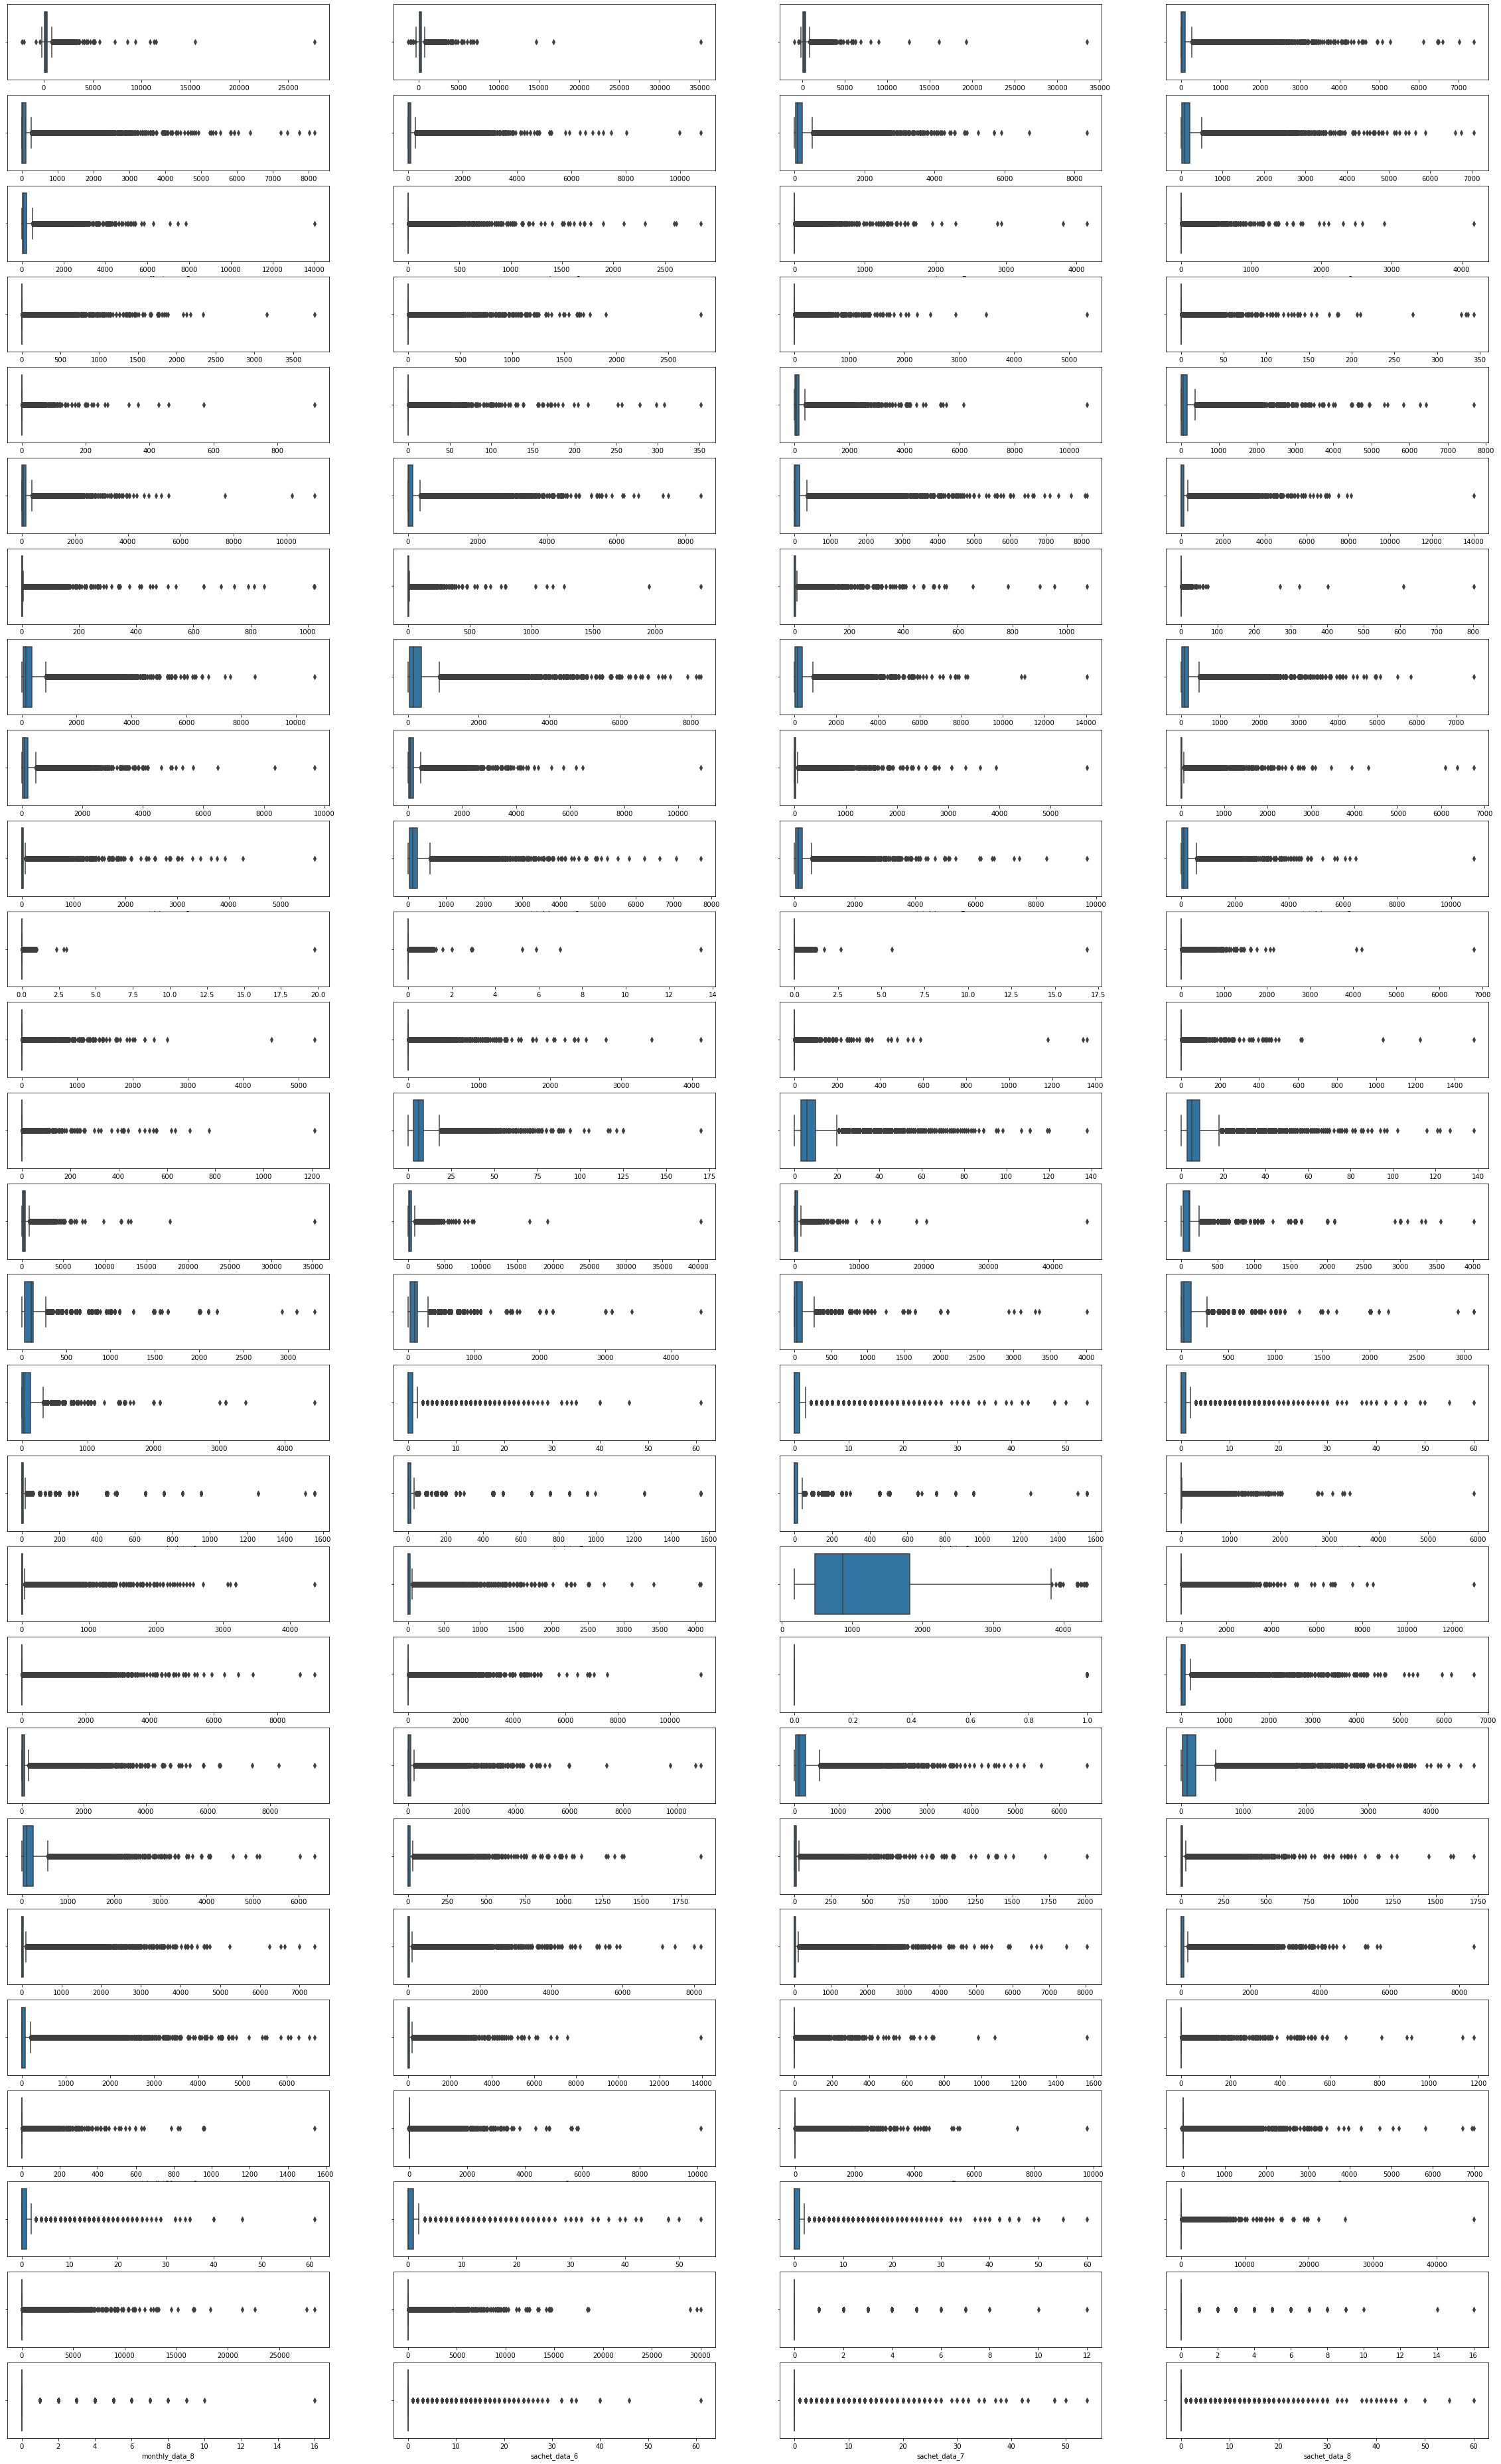

In [698]:
# plotting boxplots to view outliers

cols = 4
rows = len(data[num_col].columns)//4 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(data[num_col].columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data[name])

**We can clearly see there are so many outliers. Let's treate them**

In [699]:
# Let's check the percentage of outliers present in each column
outliers_col = []
l = []
n = []
for i in num_col:
    if(i == 'churn_probability'):
        continue
    per_100 = np.quantile(data[i], 1)
    per_75 = np.quantile(data[i], .75)
    per_50 = np.quantile(data[i], .50)
    per_25 = np.quantile(data[i], .25)

    iqr = per_75-per_25
    q4 = per_75 + iqr*1.5
    q1 = per_25 - iqr*1.5
    if(per_100 > q4):
        l.append(len(data[(data[i]<=per_100) & (data[i]>=q4)])*100/len(data))
        n.append(i)
    else:
        l.append(len(data[(data[i]<=per_100) & (data[i]>=q4)])*100/len(data))
        n.append(i)
        
        
pd.DataFrame({'col': n, 'outliers':l})       
    

col    outliers
0                arpu_6    5.787226
1                arpu_7    5.730082
2                arpu_8    5.474364
3           onnet_mou_6   12.047315
4           onnet_mou_7   12.430178
5           onnet_mou_8   12.503036
6          offnet_mou_6    8.608694
7          offnet_mou_7    8.970128
8          offnet_mou_8    8.928699
9         roam_ic_mou_6  100.000000
10        roam_ic_mou_7  100.000000
11        roam_ic_mou_8  100.000000
12        roam_og_mou_6  100.000000
13        roam_og_mou_7  100.000000
14        roam_og_mou_8  100.000000
15     loc_og_t2c_mou_6  100.000000
16     loc_og_t2c_mou_7  100.000000
17     loc_og_t2c_mou_8  100.000000
18         loc_og_mou_6    8.471550
19         loc_og_mou_7    8.600123
20         loc_og_mou_8    8.464407
21         std_og_mou_6   14.657352
22         std_og_mou_7   14.940213
23         std_og_mou_8   15.240218
24         spl_og_mou_6   16.463092
25         spl_og_mou_7   14.534493
26         spl_og_mou_8   14.065915
27          og_others_6  100.000000
28       total_og_mou_6    8.472978
29       total_og_mou_7    8.592980
30       total_og_mou_8    8.587266
31         loc_ic_mou_6    7.110102
32         loc_ic_mou_7    7.277247
33         loc_ic_mou_8    7.142959
34         std_ic_mou_6   11.681595
35         std_ic_mou_7   11.503021
36         std_ic_mou_8   11.617309
37       total_ic_mou_6    6.962957
38       total_ic_mou_7    7.157245
39       total_ic_mou_8    6.984385
40         spl_ic_mou_6  100.000000
41         spl_ic_mou_7  100.000000
42         spl_ic_mou_8  100.000000
43         isd_ic_mou_6  100.000000
44         isd_ic_mou_7  100.000000
45         isd_ic_mou_8  100.000000
46          ic_others_6  100.000000
47          ic_others_7  100.000000
48          ic_others_8  100.000000
49     total_rech_num_6    7.300104
50     total_rech_num_7    5.105787
51     total_rech_num_8    7.394391
52     total_rech_amt_6    5.862941
53     total_rech_amt_7    5.870084
54     total_rech_amt_8    5.425792
55       max_rech_amt_6    4.300061
56       max_rech_amt_7    4.032915
57       max_rech_amt_8    3.625766
58   last_day_rch_amt_6    1.865741
59   last_day_rch_amt_7    1.832883
60   last_day_rch_amt_8    1.791454
61    total_rech_data_6    6.670095
62    total_rech_data_7    7.604394
63    total_rech_data_8    7.814397
64      max_rech_data_6   22.916042
65      max_rech_data_7   17.401677
66      max_rech_data_8   16.997386
67   av_rech_amt_data_6   23.833198
68   av_rech_amt_data_7   22.361748
69   av_rech_amt_data_8   20.848869
70                  aon    0.087144
71           aug_vbc_3g  100.000000
72           jul_vbc_3g  100.000000
73           jun_vbc_3g  100.000000
74    loc_all_t2t_mou_6    9.678710
75    loc_all_t2t_mou_7    9.811569
76    loc_all_t2t_mou_8    9.672995
77    loc_all_t2m_mou_6    7.150102
78    loc_all_t2m_mou_7    7.331533
79    loc_all_t2m_mou_8    7.177245
80    loc_all_t2f_mou_6   13.113044
81    loc_all_t2f_mou_7   13.181617
82    loc_all_t2f_mou_8   12.891613
83    std_all_t2t_mou_6   16.905956
84    std_all_t2t_mou_7   16.981671
85    std_all_t2t_mou_8   17.460249
86    std_all_t2m_mou_6   13.808769
87    std_all_t2m_mou_7   14.010200
88    std_all_t2m_mou_8   14.190203
89    std_all_t2f_mou_6   24.278918
90    std_all_t2f_mou_7   24.573208
91    std_all_t2f_mou_8   24.868927
92             arpu_g_6   98.832840
93             arpu_g_7   99.662852
94             arpu_g_8   99.485707
95   count_rech_all_g_6    6.670095
96   count_rech_all_g_7    7.604394
97   count_rech_all_g_8    7.814397
98             vol_mb_6  100.000000
99             vol_mb_7  100.000000
100            vol_mb_8  100.000000
101      monthly_data_6  100.000000
102      monthly_data_7  100.000000
103      monthly_data_8  100.000000
104       sachet_data_6  100.000000
105       sachet_data_7  100.000000
106       sachet_data_8  100.000000

In [700]:
# viewing .001 and .999 quantile values in each column
filt_df = data[num_col]
low = .001
high = .999
quant_df = filt_df.quantile([low, high])
quant_df

arpu_6       arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  \
0.001   -11.579462   -14.815272    -5.000000      0.00000      0.00000   
0.999  2683.990142  2645.732588  2702.137226   3139.16284   3198.07474   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0.001      0.00000       0.00000          0.00        0.0000        0.00000   
0.999   3176.82712    3162.42736       3202.44     3156.3165      732.03272   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0.001        0.00000        0.00000         0.0000        0.00000   
0.999      672.31414      653.33682       961.5404      868.44228   

       roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0.001        0.00000           0.00000           0.00000             0.000   
0.999      855.09438          65.13032          72.83126            69.431   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
0.001       0.00000       0.00000        0.0000       0.00000       0.00000   
0.999    2627.31594    2614.45578     2326.8845    3648.57886    3886.27028   

       std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0.001         0.000        0.0000       0.00000        0.0000      0.00000   
0.999      3814.563      149.0941     208.98182      217.8921     17.48002   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
0.001         0.00000         0.00000         0.00000        0.0000   
0.999      4185.10064      4522.72336      4267.12948     2656.2057   

       loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
0.001       0.00000       0.00000       0.00000       0.00000       0.00000   
0.999    2644.66048    2470.63446    1403.01526    1430.77054    1370.74368   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
0.001         0.00000         0.00000          0.0000          0.00   
0.999      3010.29766      2998.00244       2995.4795          0.86   

       spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
0.001           0.0           0.0        0.0000        0.0000        0.0000   
0.999           1.0           1.0      744.0414      835.0635      897.5885   

       ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
0.001      0.00000       0.0000      0.00000               0.0   
0.999     92.09244     121.7842    111.51326              62.0   

       total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
0.001               0.0             0.000             0.000             0.000   
0.999              62.0            61.002          3250.036          3299.058   

       total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0.001             0.000             0.0             0.0             0.0   
0.999          3252.008          1050.0          1050.0          1098.0   

       last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0.001                 0.0                 0.0                 0.0   
0.999              1000.0              1000.0              1001.0   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
0.001                0.0                0.0                0.0   
0.999               17.0               20.0               19.0   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  \
0.001              0.0              0.0              0.0                 0.0   
0.999            655.0            655.0            655.0              1260.0   

       av_rech_amt_data_7  av_rech_amt_data_8     aon  aug_vbc_3g  jul_vbc_3g  \
0.001               0.000                 0.0   181.0     0.00000      0.0000   
0.999            1404.004              1310.0  3821.0  2882.71878   2982.1093   

       jun_vbc_3g  churn_probability  loc_all_t2t_mou_6  loc_all_t2t_mou_7  \
0.001     0.00000                0.0             0.0000            0.00000   
0.999  2895.38

In [701]:
quant_df.shape

(2, 108)

### Outlier treatment in train and test

**Imputing the values above than .99 percentile and lower than .01 percentile with the corresponding lower and upper points**

In [702]:

per_99 = 0 # .99 peercentile
per_01 = 0 # .01 ppercentile
outliers_col = []
for i in num_col:
    if(i == 'churn_probability'):
        continue
    
    # find the outlier in train set and use the same value for both in train and test
    per_99 = np.quantile(data[i], .99)
    per_01 = np.quantile(data[i], .01)


    data[i] = data[i].apply(lambda x : x if x < per_99 else per_99)                        
    data[i] = data[i].apply(lambda x : x if x > per_01 else per_01)
            
        
    test[i] = test[i].apply(lambda x : x if x < per_99 else per_99)                        
    test[i] = test[i].apply(lambda x : x if x > per_01 else per_01)

In [703]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 108)
Test df shape:  (30000, 107)


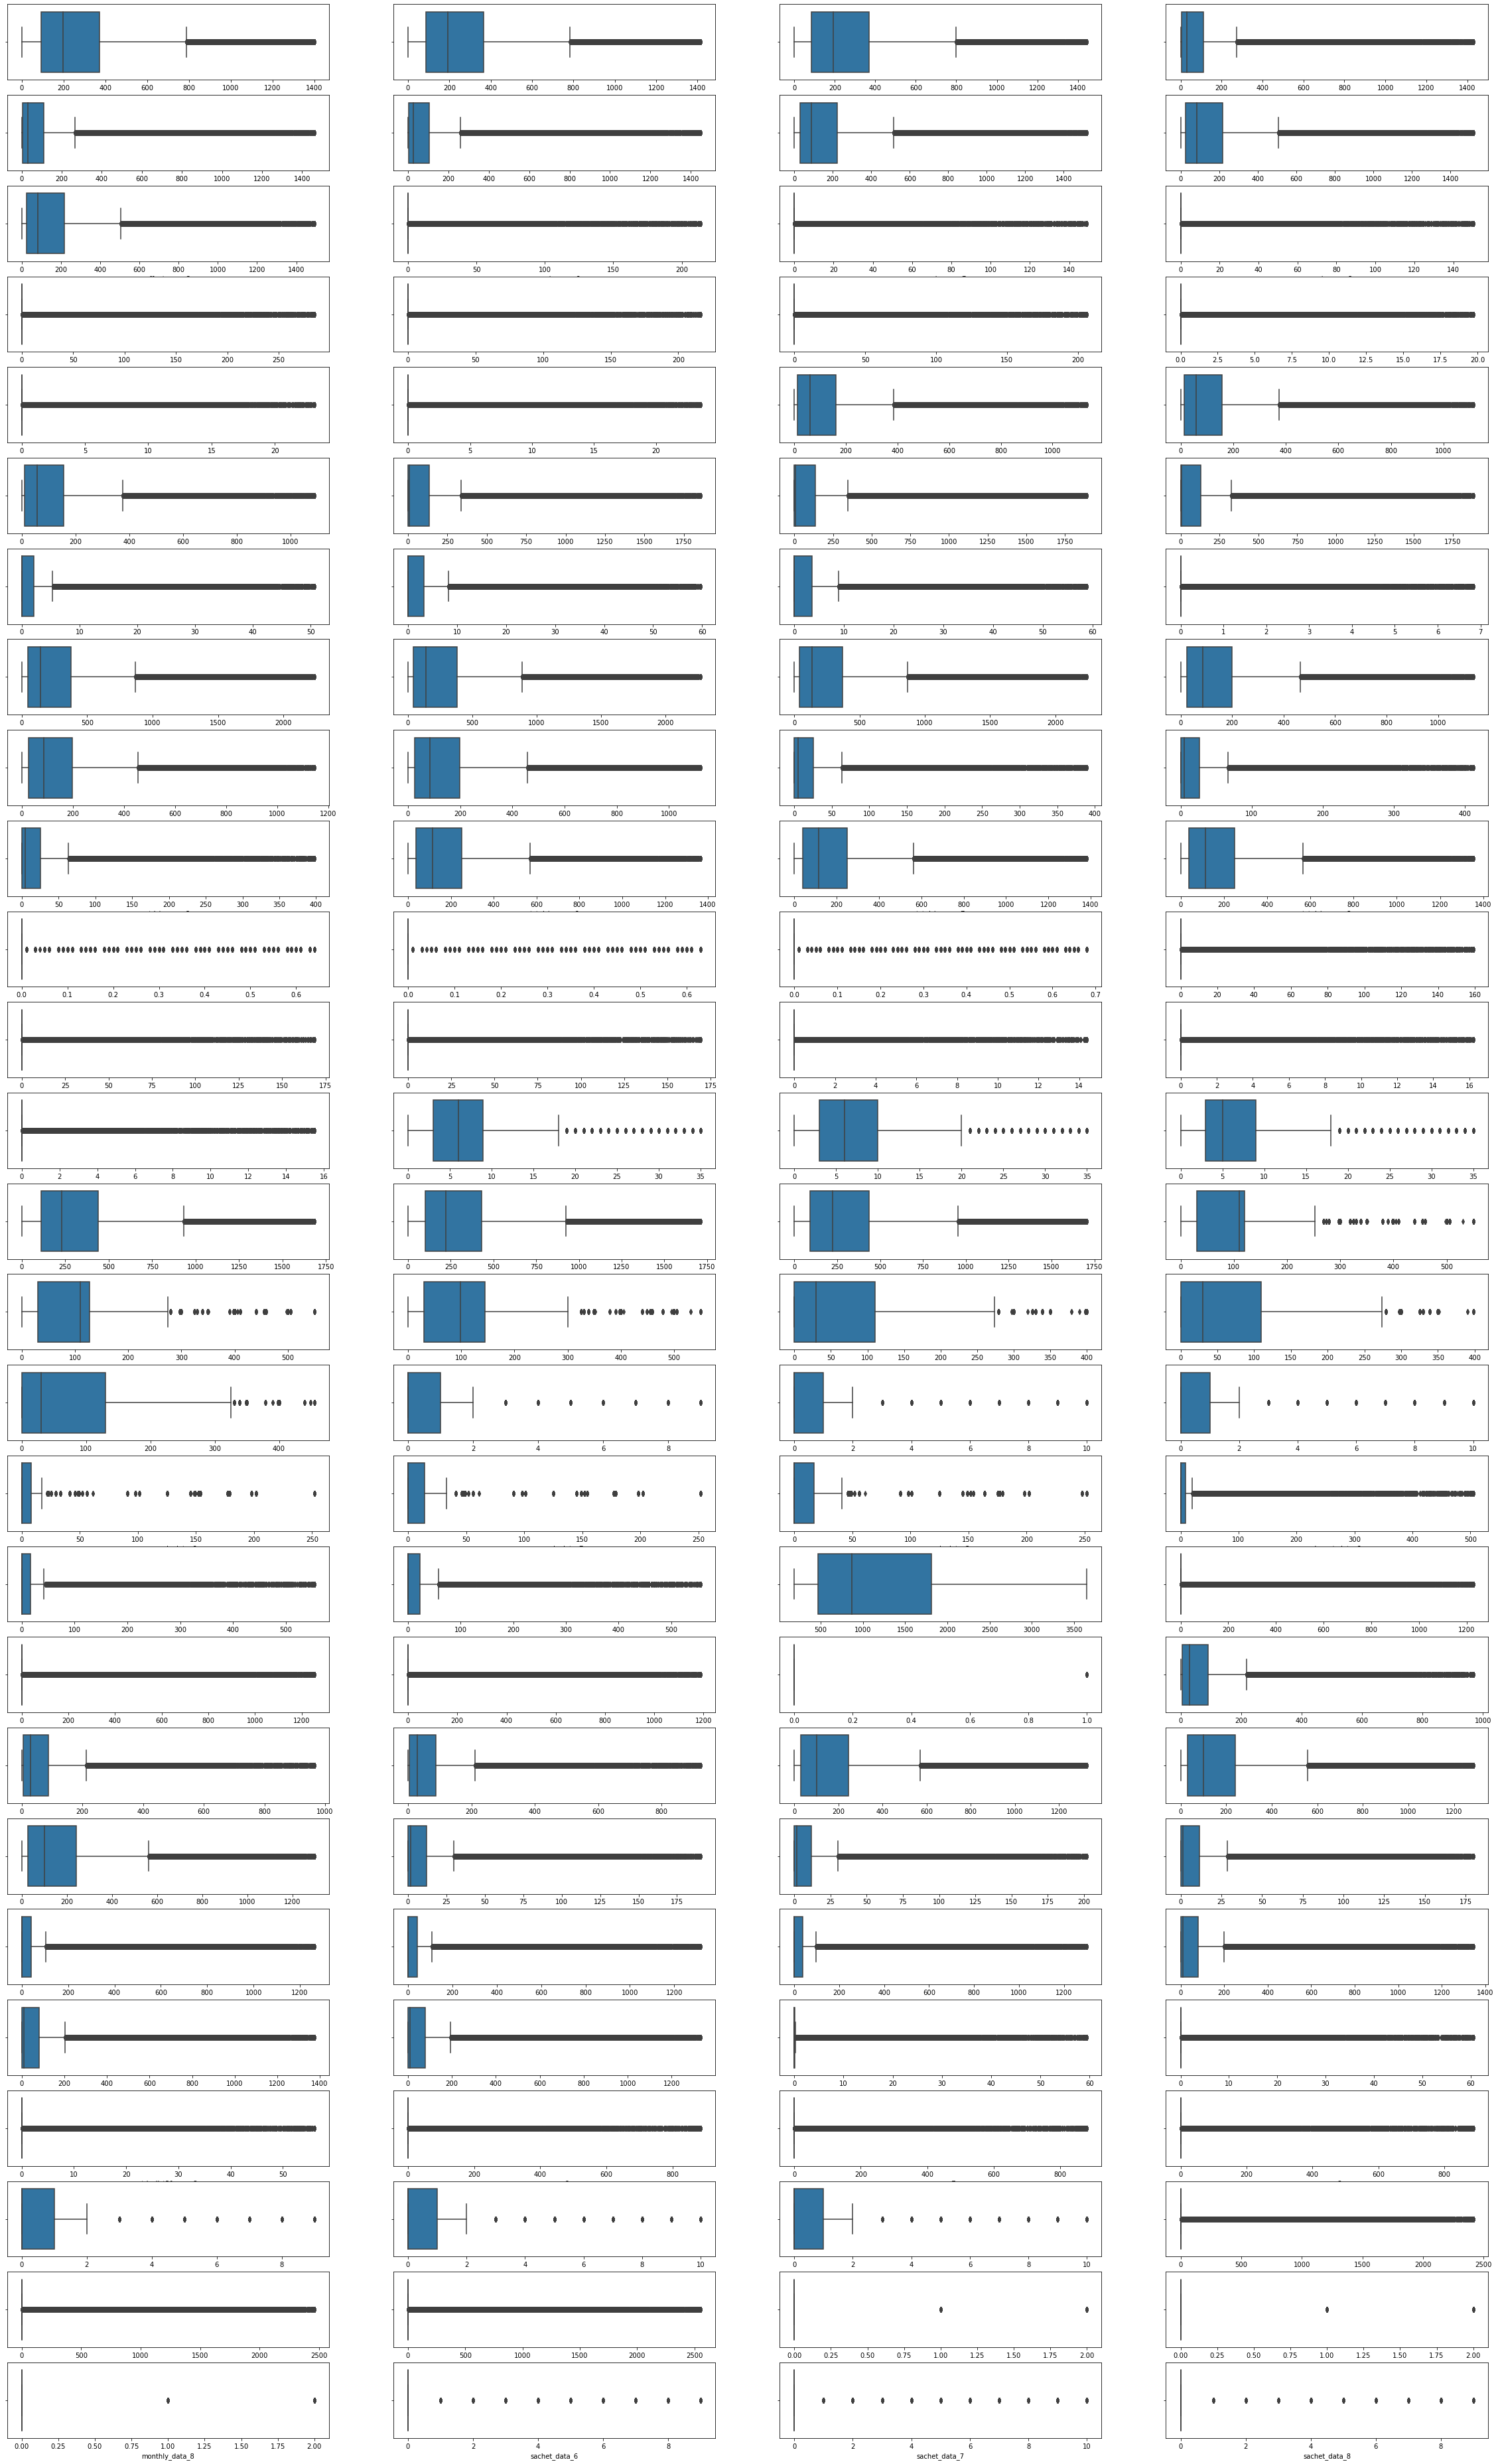

In [704]:
# graphs after outliers treatment
cols = 4
rows = len(data[num_col].columns)//4 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(data[num_col].columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data[name])

#### Outliers have been treated

### Checking high correlation variables

In [705]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
high_corr = [column for column in upper.columns if any(upper[column] > 0.80)]
print("List of highly correlated features: \n\n", high_corr)
print("\n\nTotal features with high correlation = ", len(high_corr))

List of highly correlated features: 

 ['loc_og_mou_7', 'loc_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'loc_all_t2t_mou_7', 'loc_all_t2t_mou_8', 'loc_all_t2m_mou_6', 'loc_all_t2m_mou_7', 'loc_all_t2m_mou_8', 'loc_all_t2f_mou_7', 'loc_all_t2f_mou_8', 'std_all_t2t_mou_6', 'std_all_t2t_mou_7', 'std_all_t2t_mou_8', 'count_rech_all_g_6', 'count_rech_all_g_7', 'count_rech_all_g_8', 'vol_mb_6', 'vol_mb_7', 'vol_mb_8', 'monthly_data_6', 'monthly_data_7', 'monthly_data_8', 'sachet_data_6', 'sachet_data_7', 'sachet_data_8']


Total features with high correlation =  38


#### These are highly correlated variables but we are not going to drop them as we are going to use PCA. These variables will automatically taken care by PCA

## High value customer and new columns in train and test both

In [706]:
# train

# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

# test

# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
test['total_data_rech_6'] = test.total_rech_data_6 * test.av_rech_amt_data_6
test['total_data_rech_7'] = test.total_rech_data_7 * test.av_rech_amt_data_7

print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 110)
Test df shape:  (30000, 109)


In [707]:
# train

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

# test

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
test['amt_data_6'] = test.total_rech_amt_6 + test.total_data_rech_6
test['amt_data_7'] = test.total_rech_amt_7 + test.total_data_rech_7

print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 112)
Test df shape:  (30000, 111)


In [708]:
# calculate average recharge done by customer in June, July 
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

test['av_amt_data_6_7'] = (test.amt_data_6 + test.amt_data_7)/2

In [709]:
# look at the 70th percentile recharge amount
print("Recharge amount at 60th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.6)))

Recharge amount at 60th percentile: 361.0


In [710]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
high_value_cust = data.loc[data.av_amt_data_6_7 >= data.av_amt_data_6_7.quantile(0.6), :]
high_value_cust = high_value_cust.reset_index(drop=True)
high_value_cust.shape

(28026, 113)

In [711]:
print("Train df shape: ",data.shape)
print("Test df shape: ",test.shape)

Train df shape:  (69999, 113)
Test df shape:  (30000, 112)


In [712]:
# high_value_cust.head()

In [713]:
data.shape, test.shape


((69999, 113), (30000, 112))

In [714]:
data.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00            0.0000          7.53   
1              0.00             22.01           23.5908          0.00   
2              2.14              0.00            0.0000         24.64   
3              0.00              0.00            8.0300         44.91   
4              0.00              9.85            0.0000         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0         16.04          2.61         65.09        204.99          1.01   
1          0.00          0.00          0.00          0.00          0.00   
2         12.98          0.00         28.94         84.99          0.00   
3         48.84         23.63         16.16         37.99          4.60   
4         25.94         15.76          4.35          0.00          0.00   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  total_og_mou_6  \
0          8.20          0.63          0.00         0.38           81.21   
1          0.00         30.73         31.66         0.00            0.00   
2          2.89          1.38          0.00         0.00           56.49   
3         14.95          9.13         25.61         0.00           76.03   
4          0.00         17.00          0.00         0.00           63.26   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0          221.68            3.63          3.26         24.76         24.71   
1           30.73           31.66          3.44         39.44         25.03   
2           99.36            0.00         94.38         31.34         30.01   
3           95.98           53.84         86.21         49.89         81.03   
4           42.94           15.76         21.54          9.36         28.31   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0          7.46         27.58         15.18           11.84           53.04   
1          0.00          0.00          0.00            3.44           39.44   
2         29.91          2.48          6.38          124.29           33.83   
3          8.89          0.28          2.81           95.11           50.18   
4          0.00          0.00          0.00           21.54            9.36   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0           40.56           0.0           0.0          0.66           0.0   
1           25.04           0.0           0.0          0.01           0.0   
2           36.64           0.0           0.0          0.00           0.0   
3           83.84           0.0           0.0          0.00           0.0   
4           28.31           0.0          

In [715]:
#data = high_value_cust.copy()

In [716]:
data.shape

(69999, 113)

In [717]:
# data.corr()

## Data Visualization

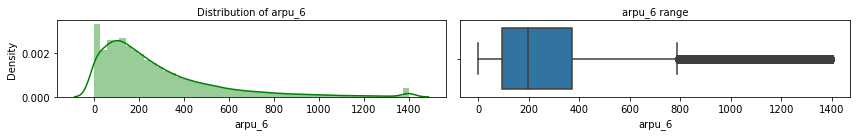

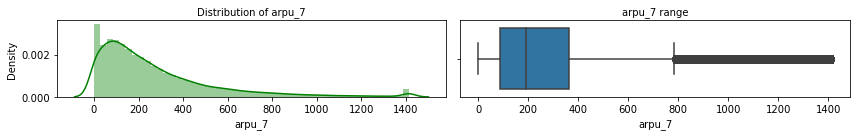

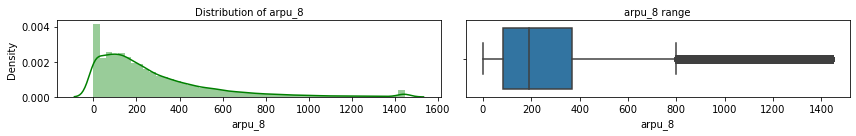

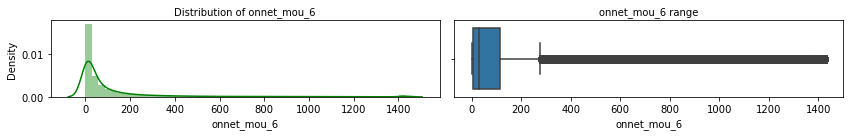

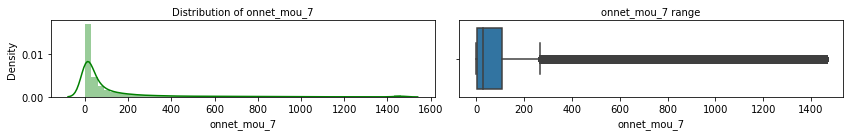

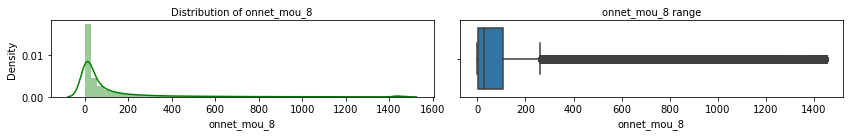

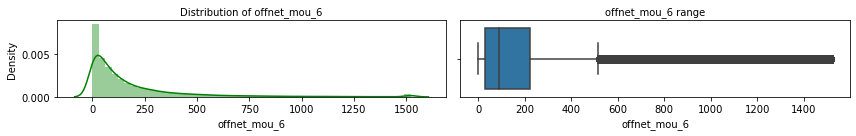

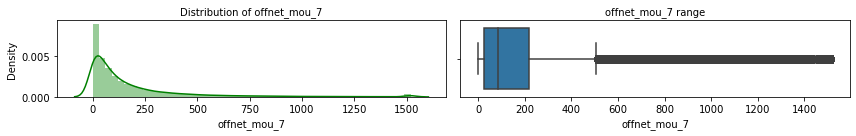

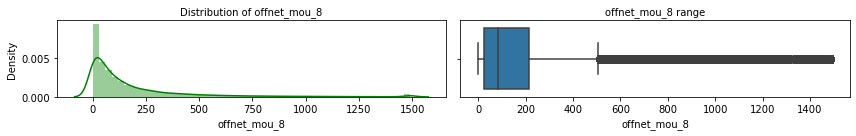

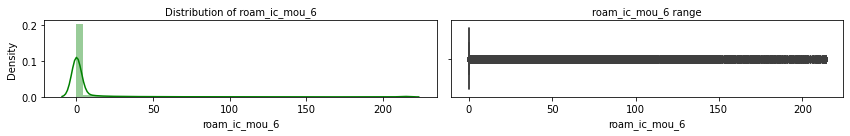

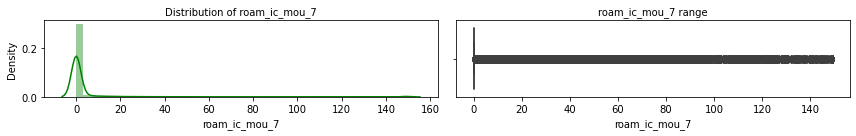

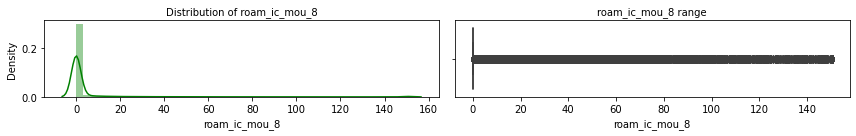

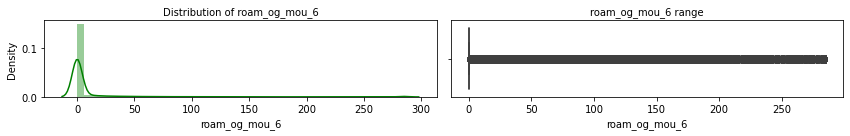

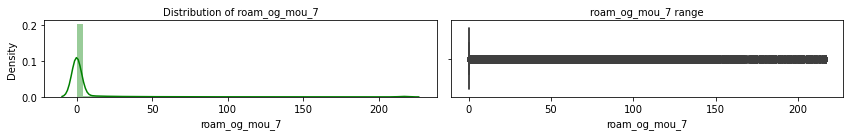

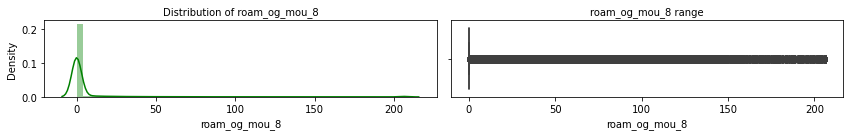

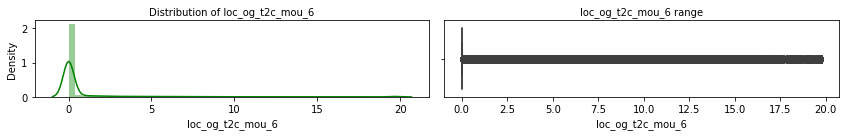

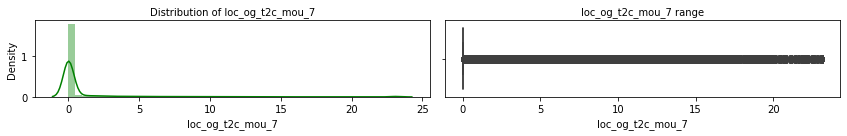

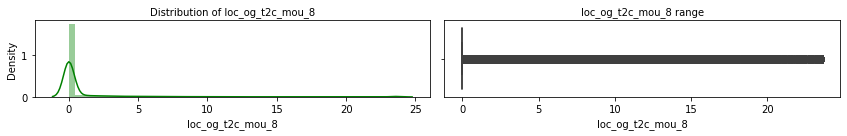

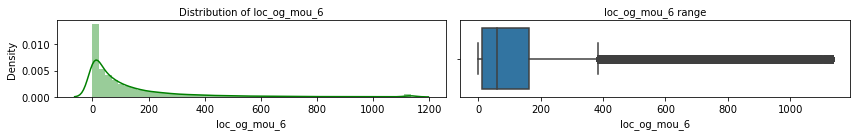

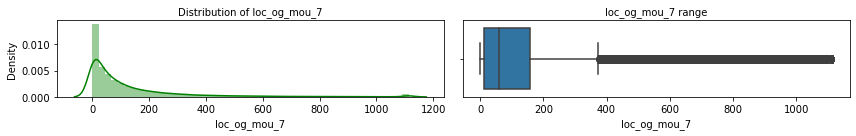

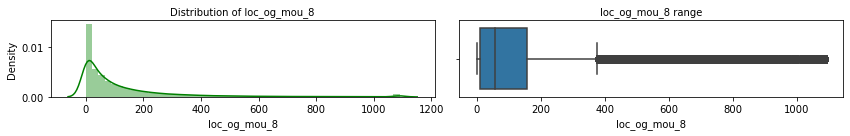

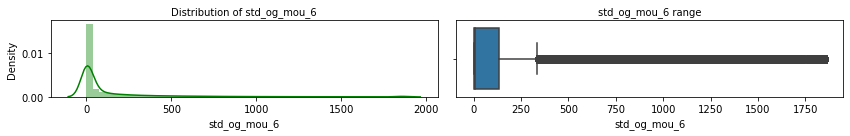

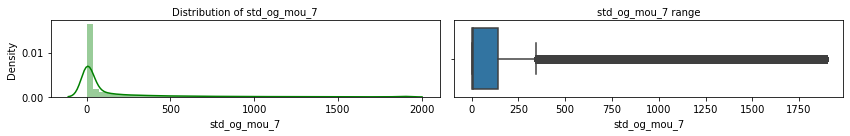

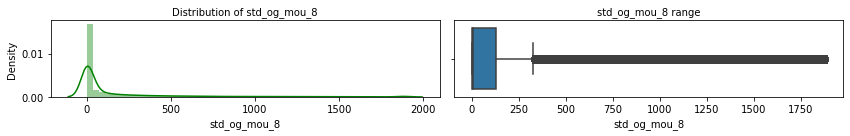

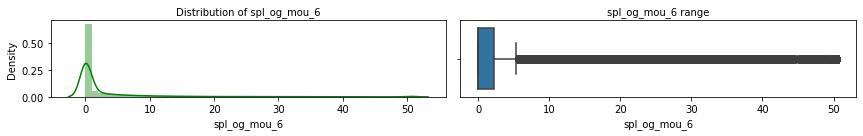

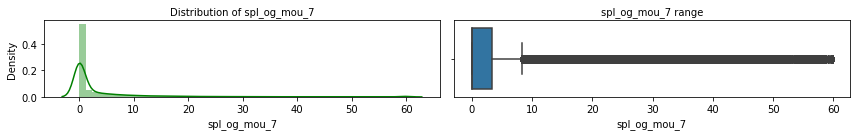

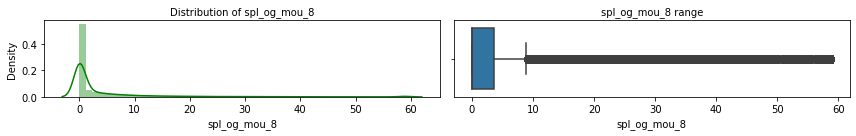

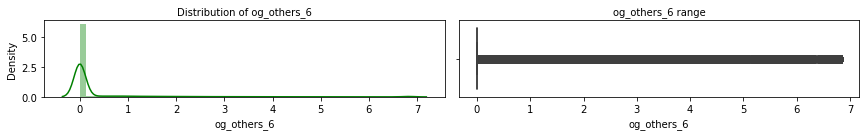

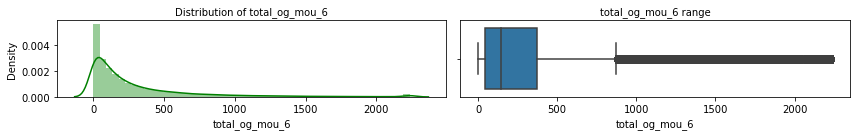

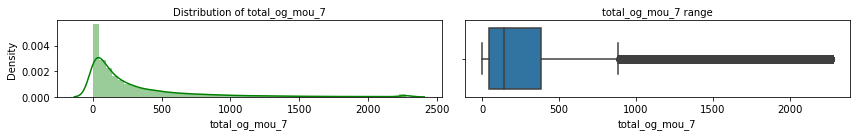

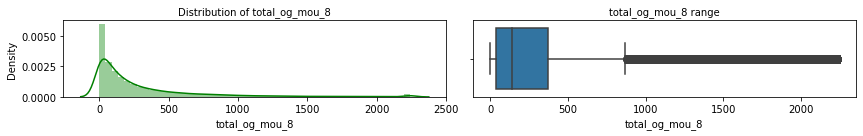

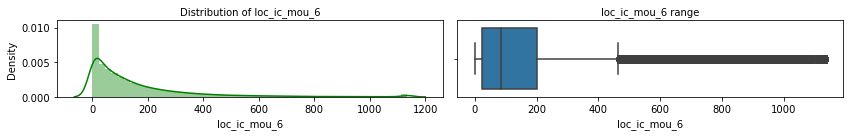

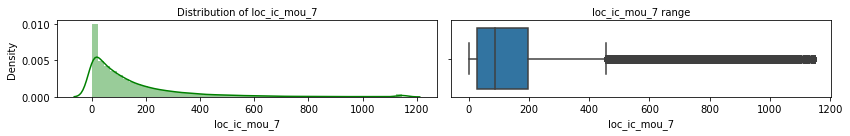

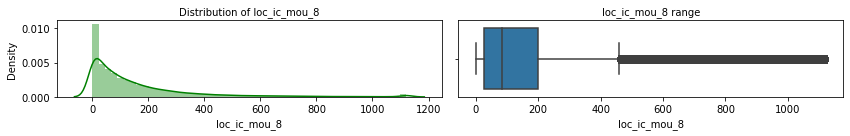

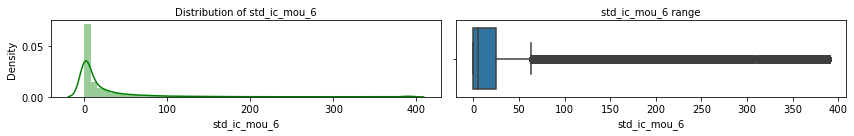

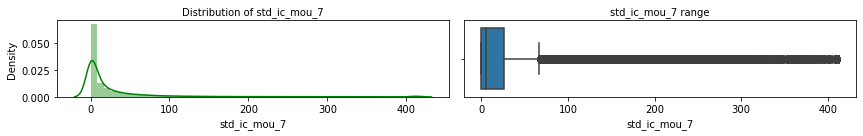

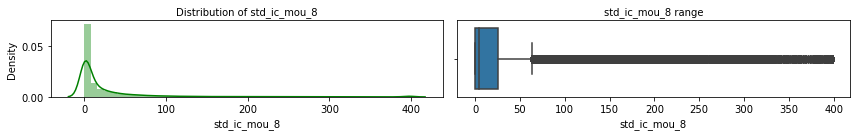

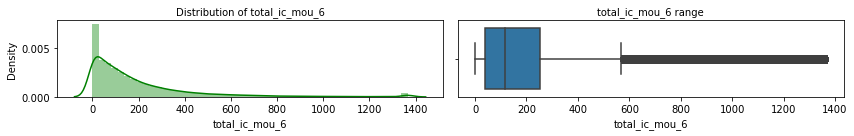

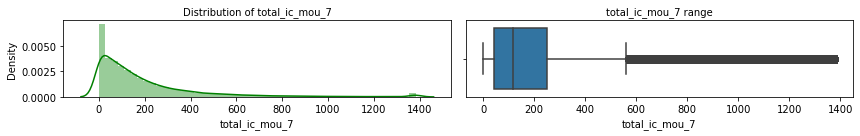

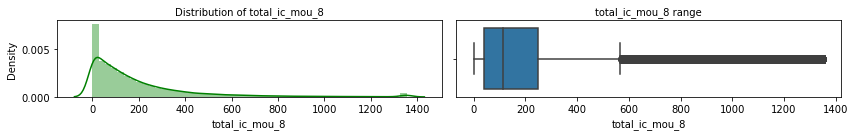

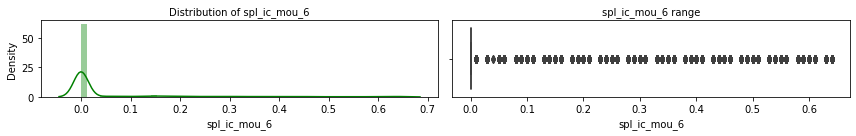

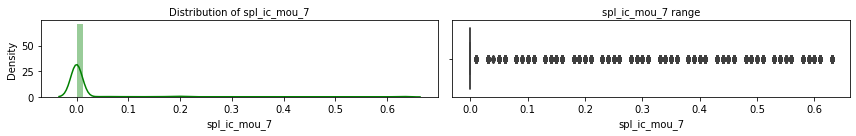

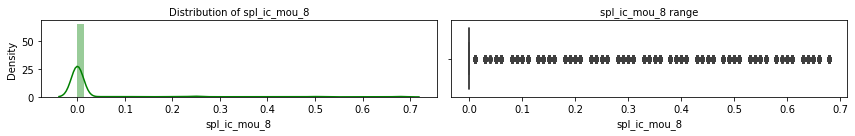

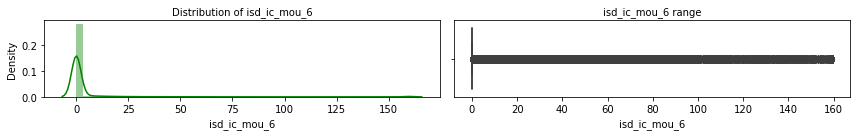

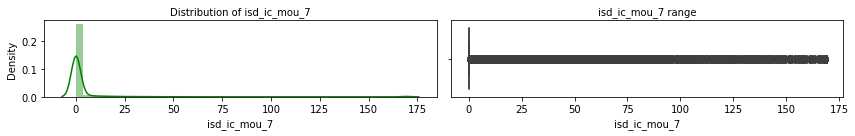

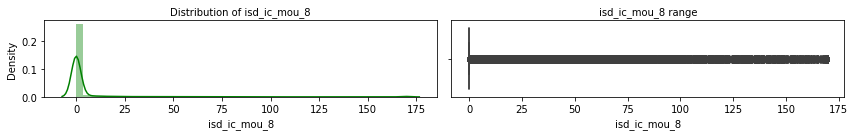

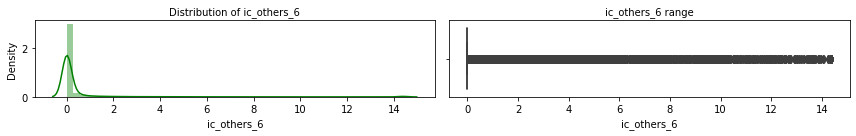

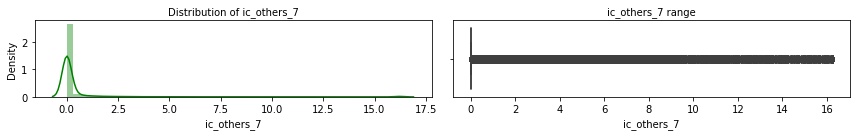

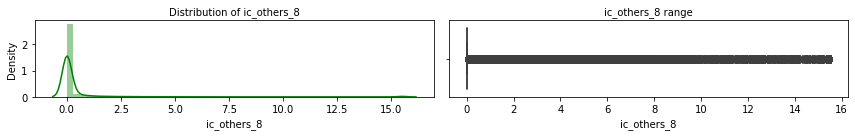

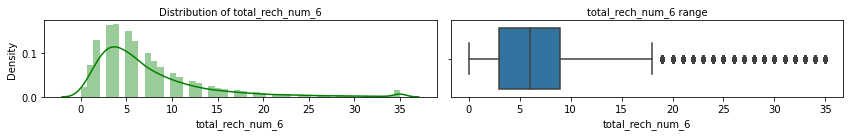

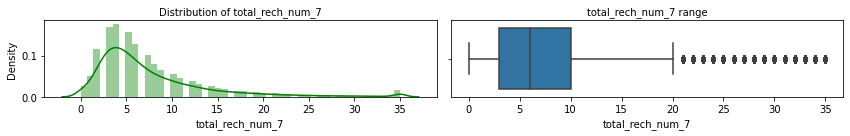

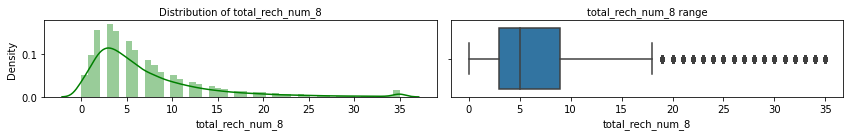

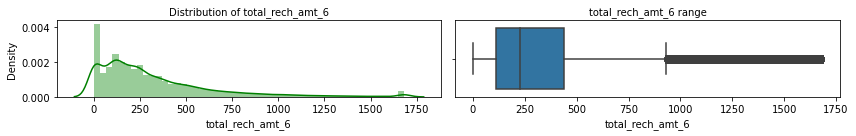

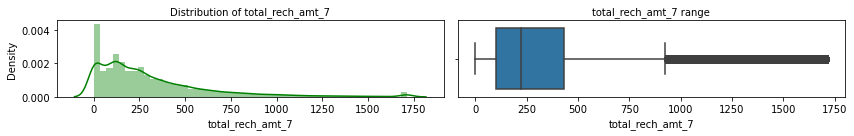

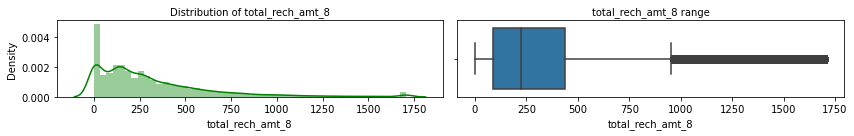

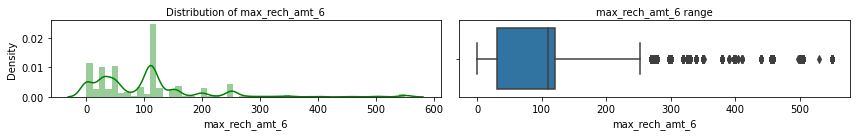

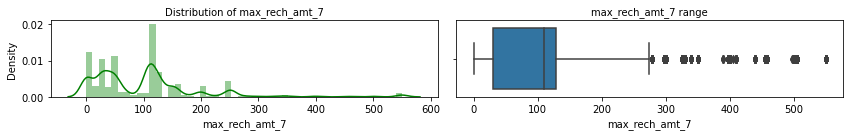

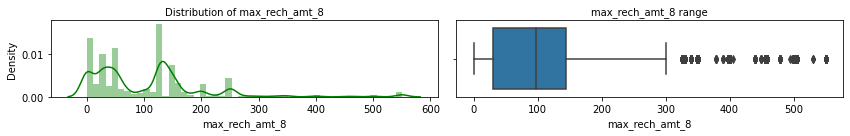

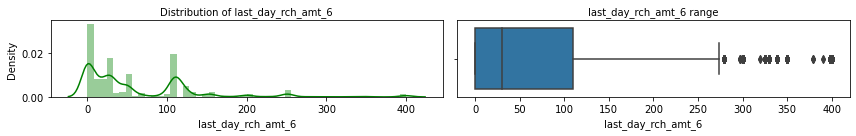

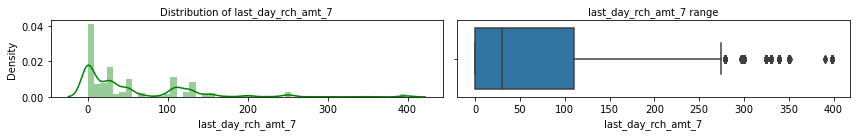

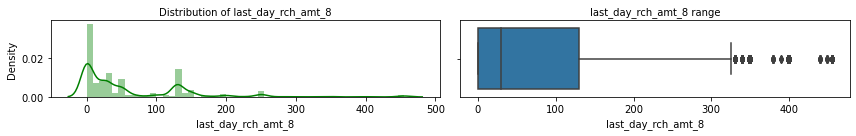

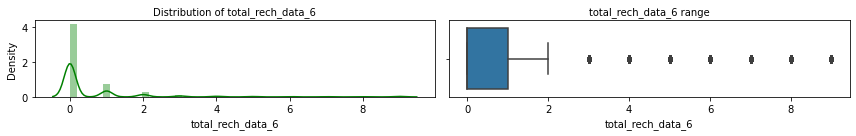

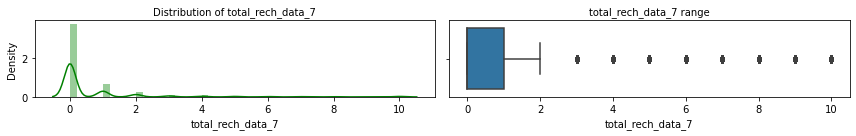

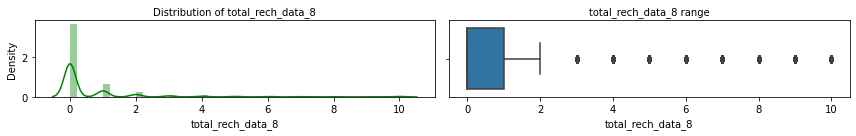

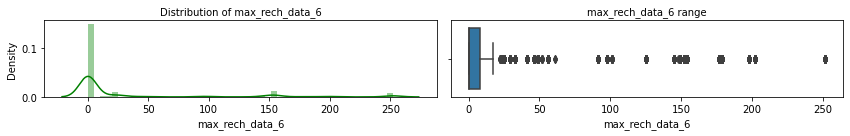

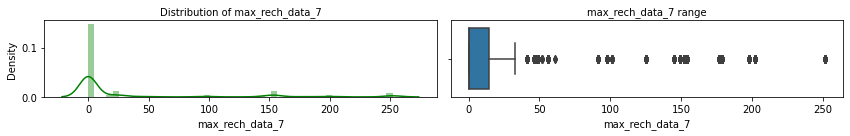

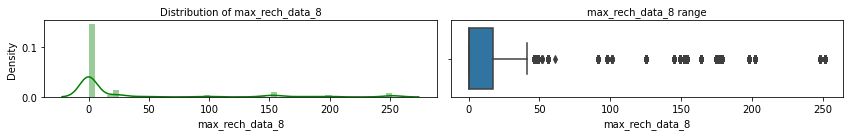

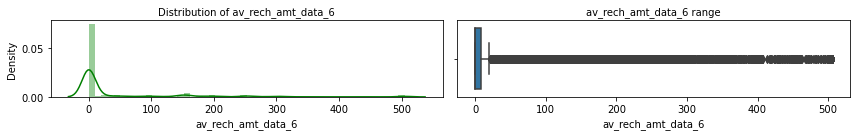

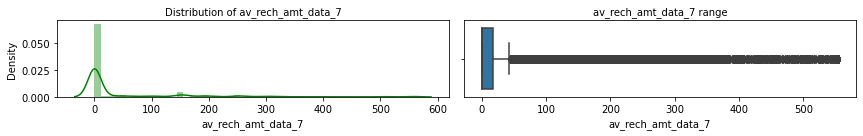

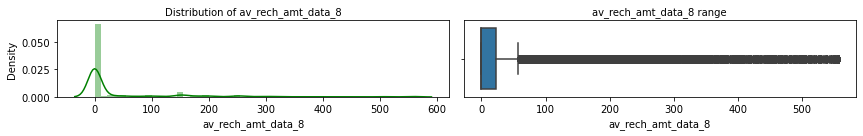

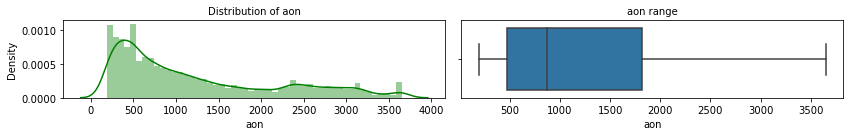

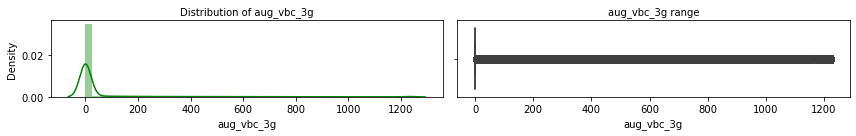

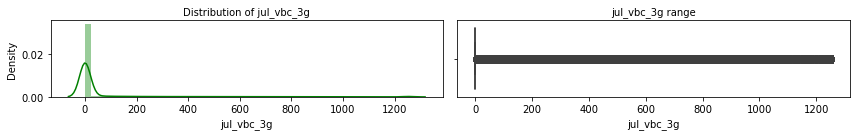

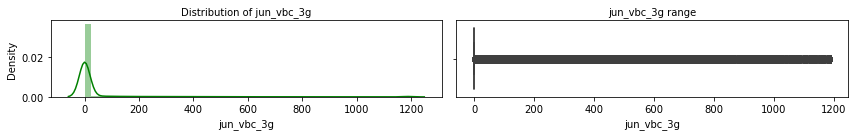

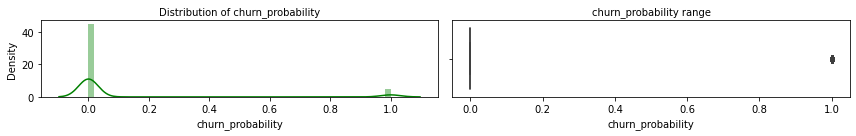

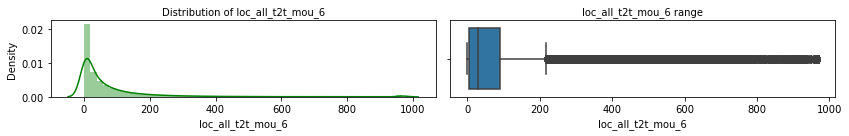

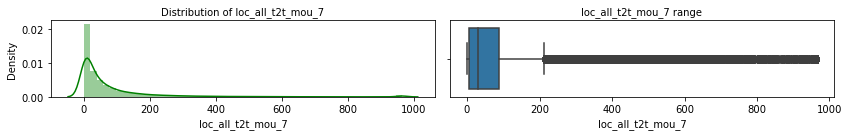

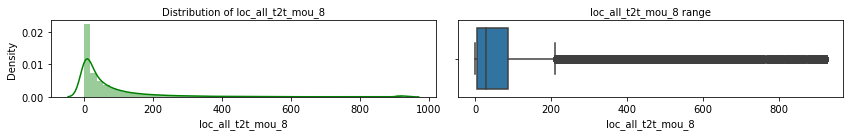

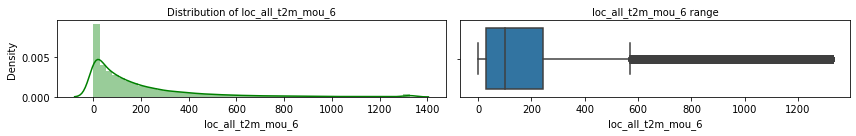

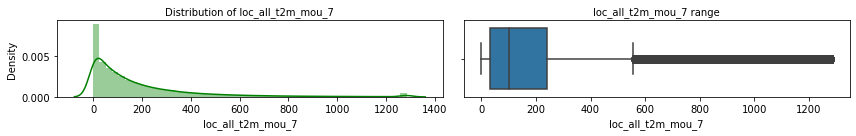

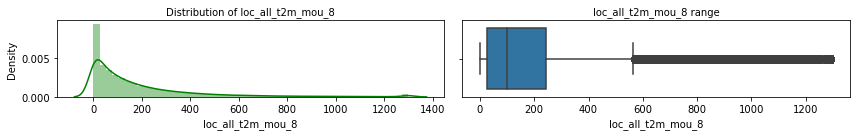

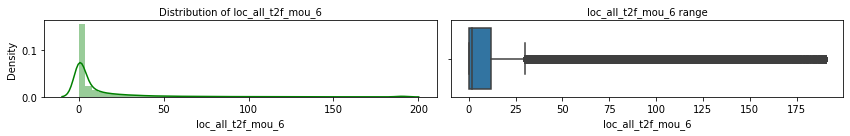

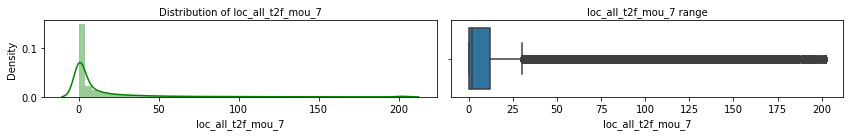

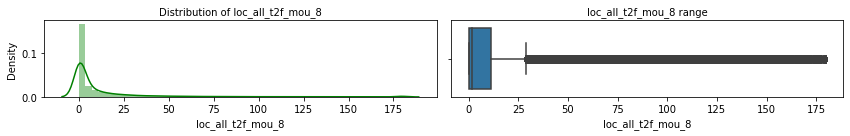

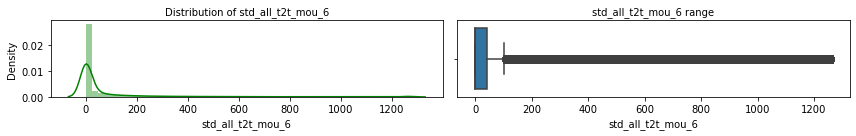

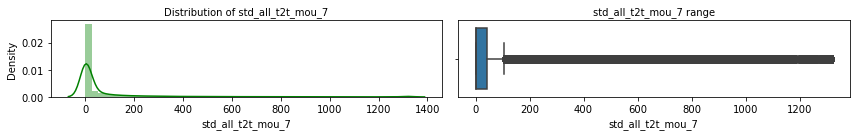

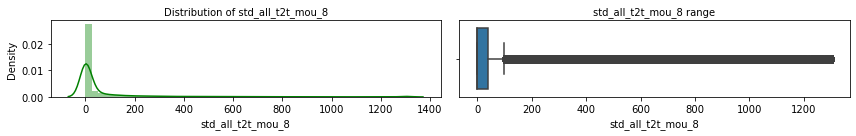

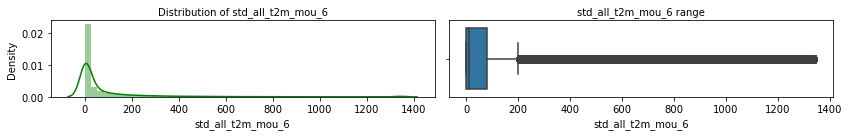

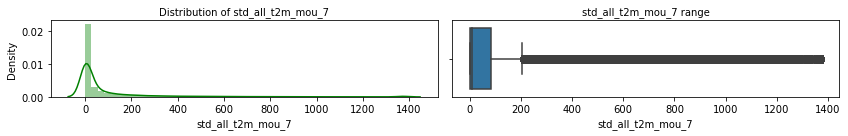

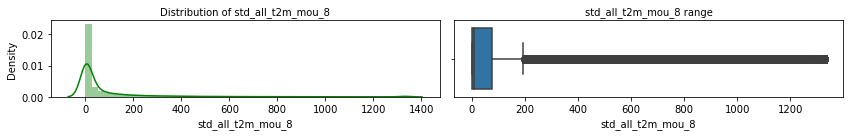

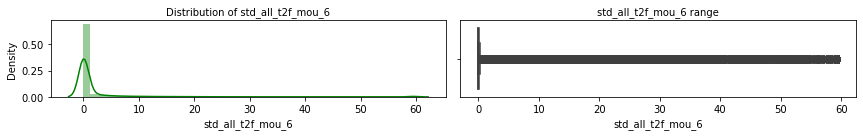

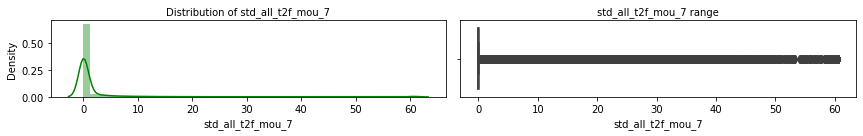

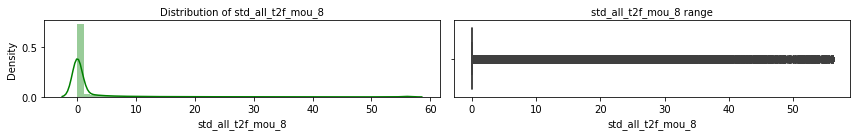

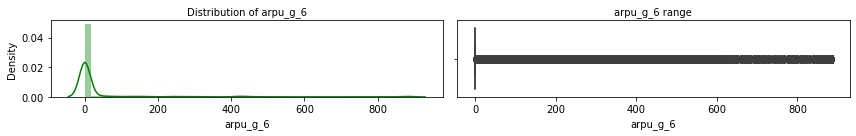

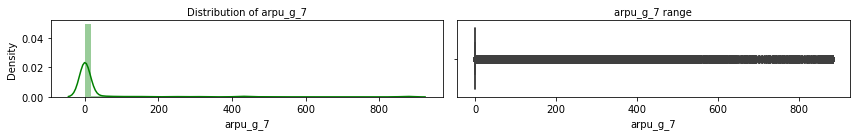

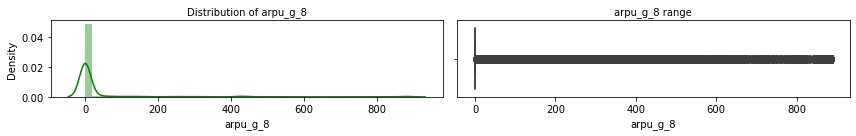

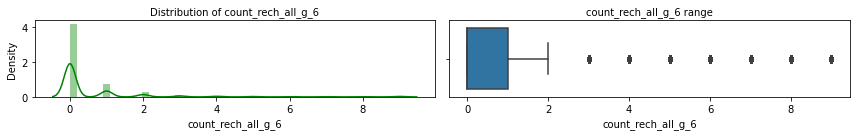

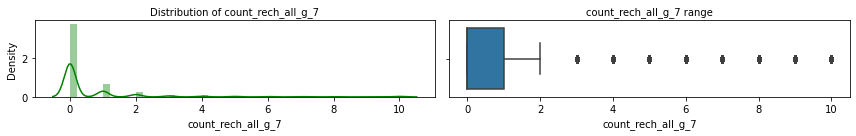

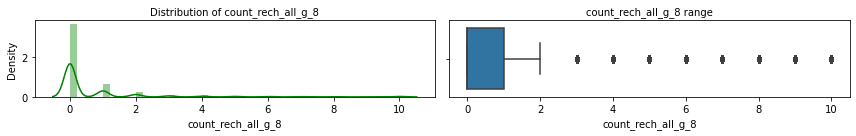

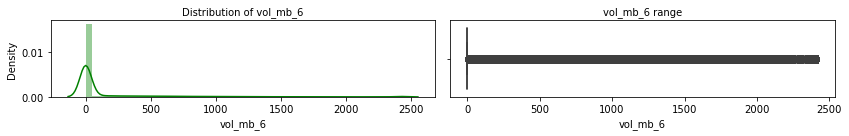

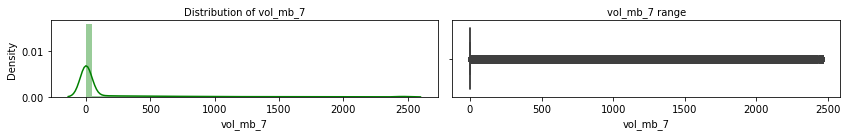

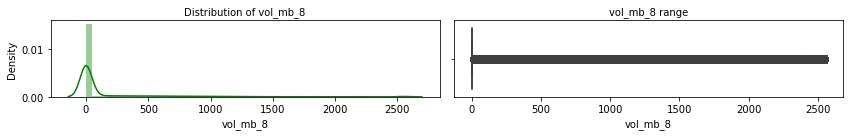

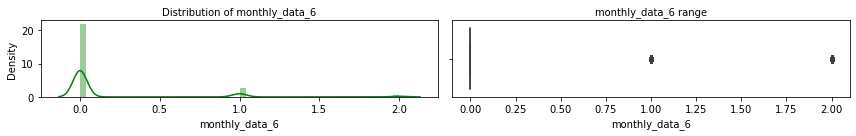

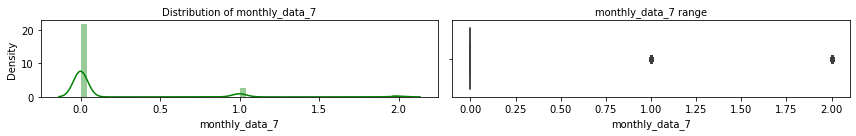

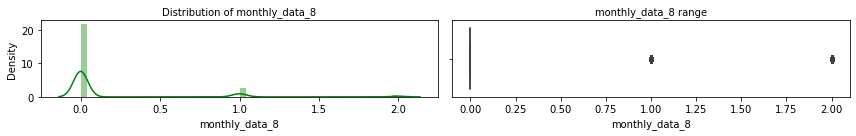

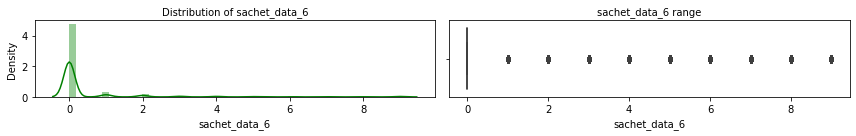

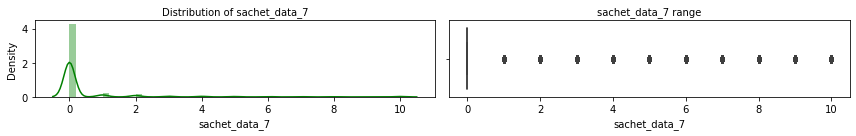

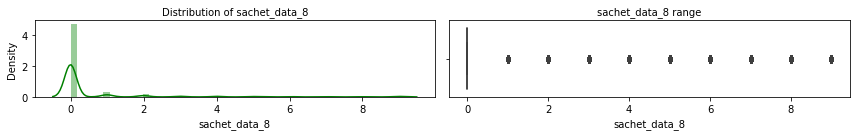

In [718]:
# View distribution and data range in cols
for i in range(len(num_col)):
    fig, axes = plt.subplots(1,2,figsize=(12,2))
    sns.distplot(data[num_col[i]], hist=True, kde=True, color='g', ax=axes[0])
    sns.boxplot(data[num_col[i]], ax=axes[1])
    axes[0].set_title('Distribution of {}'.format(num_col[i]), fontsize=10)
    axes[1].set_title('{} range'.format(num_col[i]), fontsize=10)
    plt.tight_layout()
    plt.show()

In [719]:
# Function for Default Plotting variables

def plotting_variable(figure_title, x_label, y_label):
    
    plt.title(figure_title)
    plt.xlabel(x_label, labelpad = 15)
    plt.ylabel(y_label, labelpad = 10)
    

# Custom function for Bivariate Analysis

def bivariate(y_axis):
    
    plt.figure(figsize=(16, 4))
    
    x_label = "Churn"
    x_axis = "churn_probability"
    
    title1 = "June - " + x_label
    title2 = "July - " + x_label
    title3 = "August - " + x_label
    
    print("Data visualization for "+ y_axis)
    
    # plot 1
    plt.subplot(1,3,1)
    sns.boxplot(x = x_axis, y = y_axis + '_6', hue="churn_probability", data=data)
    plotting_variable(title1, x_label, y_axis+"_6")
    
    # plot 2
    plt.subplot(1,3,2)
    sns.boxplot(x = x_axis, y = y_axis + '_7', hue="churn_probability", data=data)
    plotting_variable(title2, x_label, y_axis+"_7")
    
    # plot 3
    plt.subplot(1,3,3)
    sns.boxplot(x = x_axis, y = y_axis + '_8', hue="churn_probability", data=data)
    plotting_variable(title3, x_label, y_axis+"_8")
    
    plt.subplots_adjust(wspace=0.4)
    plt.show()

Data visualization for arpu


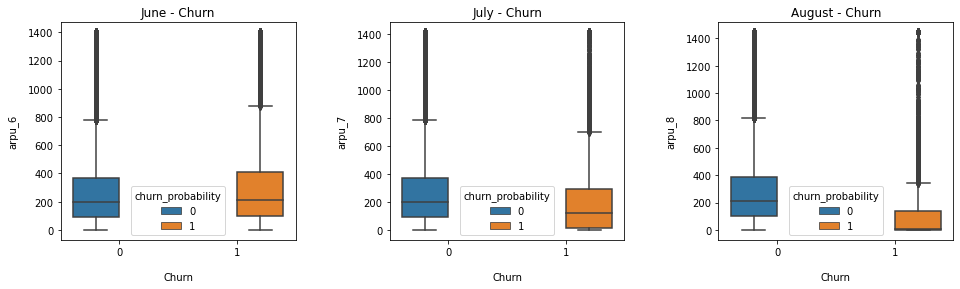

Data visualization for loc_og_mou


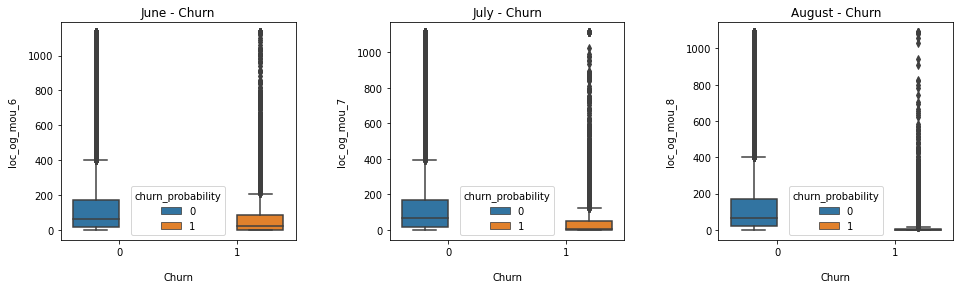

Data visualization for loc_ic_mou


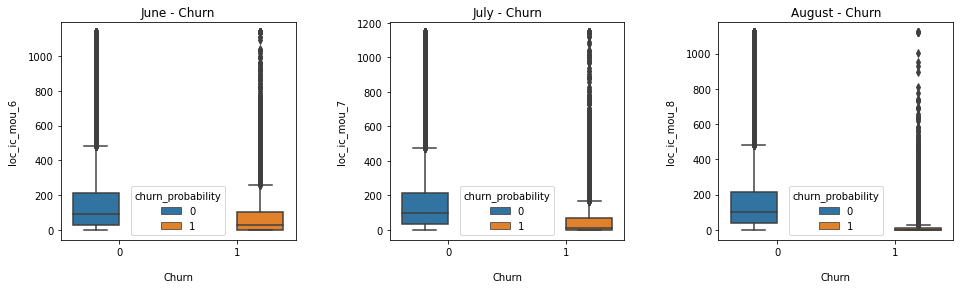

Data visualization for std_og_mou


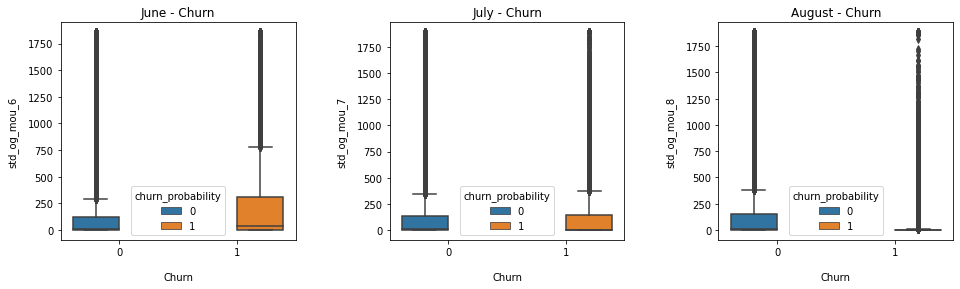

Data visualization for std_ic_mou


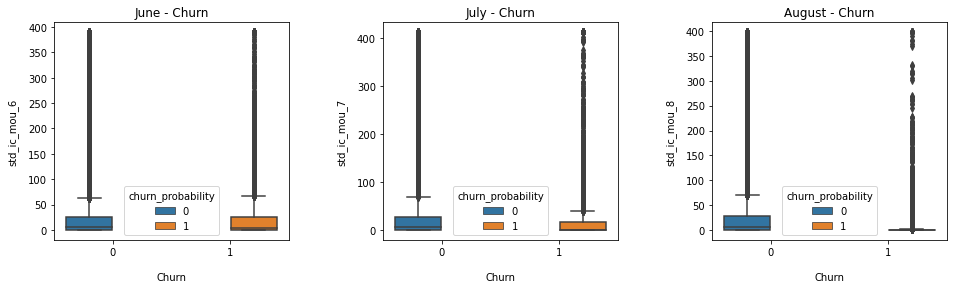

Data visualization for monthly_data


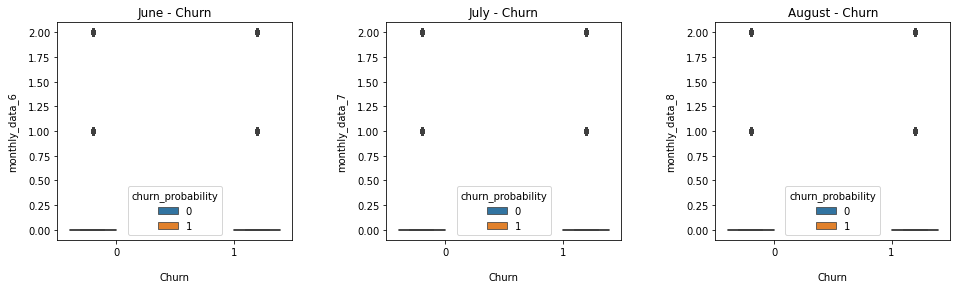

In [720]:
# Bivariate Analysis

bivariate("arpu")
bivariate("loc_og_mou")
bivariate("loc_ic_mou")
bivariate("std_og_mou")
bivariate("std_ic_mou")
bivariate("monthly_data")

**There is a slight drop in August of Churned customers as compared to in previous months.**

## Model Building

### Building the base model without anything i.e. PCA 

In [721]:
# Define the funcitons for model metric and roc curve

def classificationReport( actual, pred ):
    print('Classification report :\n')
    print(classification_report(actual, pred))

    return None

def model_metrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    accur = (TP+TN)/(FP+FN+TP+TN)
    sens = TP / float(TP+FN) # Recall
    specif = TN / float(TN+FP)
    fpr = FP/ float(TN+FP)
    ppv = TP / float(TP+FP)
    
    prec = TP/(TP+FP)
    f1 = 2 * (prec * sens) / (prec + sens)
    
    print('accuracy : ', accur)
    print('sensitivity : ', sens)
    print('specificity : ', specif)
    print('FPR : ', fpr)
    #print('precision : ', prec)
    #print('F1 Score : ', f1)
    
    print('*****')

In [722]:
# make the copy for this data
df = data.copy()

## Scaling

In [723]:
data.shape, df.shape

((69999, 113), (69999, 113))

In [724]:
# Separate out the target and independent variables
y_train = df.pop('churn_probability')
X_train = df

In [725]:
# Using Standard Scaling
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

# test
test[test.columns] = scaler.transform(test[test.columns])


In [726]:
# shape for X and y
y_train.shape, X_train.shape

((69999,), (69999, 112))

In [727]:
# make all the columns as float
for i in X_train.columns:
    X_train[i] = X_train[i].astype(np.float64)

# Model 1 - Simple Logistic Regression

In [728]:
# Fitting the Logistic regression model
model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [729]:
# Predicting for X_train
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [730]:
# creating confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)

In [731]:
confusion

array([[61846,  1021],
       [ 4672,  2460]])

In [732]:
# print model metrics
model_metrics(confusion)
classificationReport(y_train, y_train_pred)

accuracy :  0.9186702667180959
sensitivity :  0.34492428491306787
specificity :  0.9837593650086691
FPR :  0.016240634991330907
*****
Classification report :

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     62867
           1       0.71      0.34      0.46      7132

    accuracy                           0.92     69999
   macro avg       0.82      0.66      0.71     69999
weighted avg       0.91      0.92      0.91     69999



#### Base model is not performing well. The accuracy is good but other scores like sensitivity, precision and F1 is low. We'll now use feature transformation using PCA

## Perform PCA

In [733]:
# Instantiate and fit on train
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [734]:
# check components
pca.components_

array([[ 1.64508636e-01,  1.76701577e-01,  1.64340889e-01, ...,
         1.64512435e-01,  1.67721560e-01,  1.84573582e-01],
       [-7.37794510e-02, -8.29735324e-02, -7.75829846e-02, ...,
         6.49065078e-02,  7.05447867e-02,  7.53880012e-02],
       [ 3.39291738e-02,  5.08836873e-02,  3.83927893e-02, ...,
         6.20340581e-02,  7.82514591e-02,  7.84084549e-02],
       ...,
       [ 0.00000000e+00,  1.18581361e-16,  2.41494837e-16, ...,
         1.06281768e-01, -1.09762101e-01, -2.29049348e-01],
       [-0.00000000e+00,  6.78150455e-17,  2.51107911e-17, ...,
         3.69224999e-01, -2.27498539e-01, -8.10407145e-02],
       [ 0.00000000e+00,  5.42954765e-17,  2.37276069e-16, ...,
        -3.06612323e-01,  2.42239661e-01,  5.10185431e-01]])

In [735]:
# Explained variance ratio
pca.explained_variance_ratio_

array([1.84124109e-01, 1.22770327e-01, 8.42296360e-02, 5.69780907e-02,
       3.41140040e-02, 3.26763611e-02, 3.00008767e-02, 2.88225044e-02,
       2.44821979e-02, 2.25021399e-02, 2.09898567e-02, 1.88329611e-02,
       1.79453237e-02, 1.71544241e-02, 1.49057726e-02, 1.33534698e-02,
       1.32485080e-02, 1.16790758e-02, 1.09191344e-02, 1.07939048e-02,
       1.01538280e-02, 1.00260520e-02, 9.66640984e-03, 8.95054631e-03,
       8.58859374e-03, 8.16506077e-03, 7.74087694e-03, 7.68034082e-03,
       7.35718247e-03, 7.14155704e-03, 6.78692348e-03, 6.59770132e-03,
       6.59337131e-03, 6.06435773e-03, 5.83212965e-03, 5.78013344e-03,
       5.41005322e-03, 5.12769610e-03, 5.01059298e-03, 4.80711006e-03,
       4.18830785e-03, 4.04836662e-03, 3.92783052e-03, 3.33139231e-03,
       3.21310430e-03, 3.07007586e-03, 3.01079789e-03, 2.94800505e-03,
       2.88201936e-03, 2.78323439e-03, 2.59299256e-03, 2.48706901e-03,
       2.43968710e-03, 2.33048749e-03, 2.30163216e-03, 2.20557093e-03,
      

<BarContainer object of 112 artists>

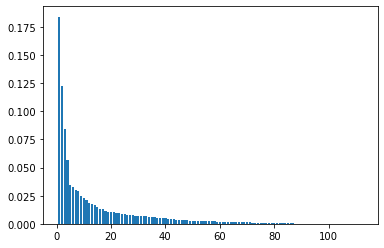

In [736]:
# Plotting
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [737]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

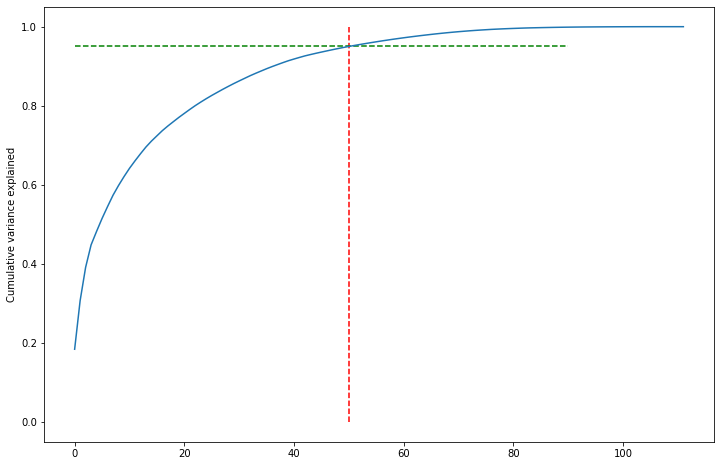

In [738]:
# Making a scree plot for the explained variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

We can see that around 95% of variance is explained by 50 pca components, we will use them

In [739]:
# Performing PCA with 50 components as presented by the scree plot

pca_final = IncrementalPCA(n_components=50)

In [740]:
# Train
X_train_pca = pca_final.fit_transform(X_train)

In [741]:
# Final shape
X_train_pca.shape

(69999, 50)

In [742]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [743]:
corrmat.shape

(50, 50)

<AxesSubplot:>

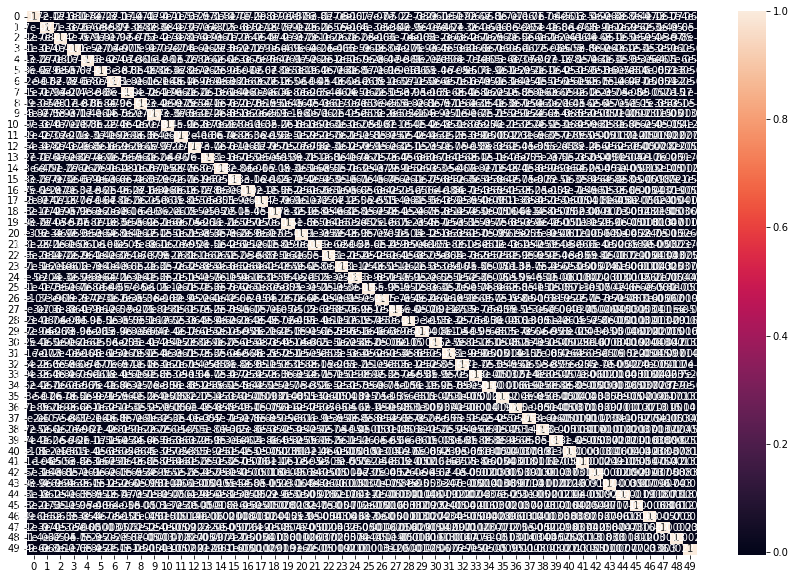

In [744]:
# plotting the heatmap of the corr matrix
plt.figure(figsize=[15,10])
sns.heatmap(corrmat, annot=True)

All the 50 PCA components are merely autocorrelated

In [745]:
# Transforming on test
test_pca = pca_final.transform(test)

In [746]:
test_pca.shape

(30000, 50)

# Model 2 - Logistic Tegression with PCA

In [747]:
# initialise and fit and predict on train
model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train_pca, y_train)
y_train_pred = model.predict(X_train_pca)

In [748]:
confusion = confusion_matrix(y_train, y_train_pred)

In [749]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_train_pred)

accuracy :  0.9120130287575536
sensitivity :  0.26374088614694335
specificity :  0.9855568104092767
FPR :  0.014443189590723273
*****
Classification report :

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     62867
           1       0.67      0.26      0.38      7132

    accuracy                           0.91     69999
   macro avg       0.80      0.62      0.67     69999
weighted avg       0.90      0.91      0.89     69999



**Model is not doing good even after PCA because of class imbalance**

### Checking Class imbalance

<AxesSubplot:>

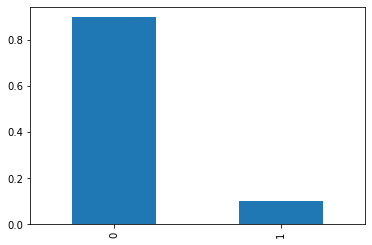

In [750]:
data.churn_probability.value_counts(1).plot.bar()

In [751]:
data.shape

(69999, 113)

In [752]:
data.churn_probability.value_counts().values[1]/len(data.index)*100

10.188716981671167

In [753]:
data.churn_probability.value_counts().values[0]/len(data.index)*100

89.81128301832884

**Around 89% of the data belongs to class 0 and 10% to class 1. Let's find the class weights**

## Finding the class weights

In [754]:
unique_classes = list(data['churn_probability'].unique())
print(unique_classes)
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = data.shape[0]/((data.loc[data['churn_probability'] == classes].shape[0])
                                     *len(unique_classes))
print('Weights are : ', out_dict)

[0, 1]
Weights are :  {0: 0.5567229229961665, 1: 4.907389231632081}


In [755]:
X_train.shape , y_train.shape

((69999, 112), (69999,))

#  Model 3 -  without PCA after class balance Logistic Regression

In [756]:
model = LogisticRegression(random_state=100, solver='liblinear', class_weight=out_dict).fit(X_train, y_train)

In [757]:
y_p = model.predict(X_train)

In [758]:
confusion = confusion_matrix(y_train, y_p)

In [759]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_p)

accuracy :  0.8028686124087487
sensitivity :  0.8585249579360628
specificity :  0.7965546312055609
FPR :  0.20344536879443906
*****
Classification report :

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     62867
           1       0.32      0.86      0.47      7132

    accuracy                           0.80     69999
   macro avg       0.65      0.83      0.67     69999
weighted avg       0.91      0.80      0.84     69999



Now, without PCA and with class balance, model is good as accuracy is .80, sensitivity is also good. 

#  Model 4 -   PCA after class balance Logistic Regression

In [760]:
model = LogisticRegression(random_state=100, solver='liblinear', class_weight=out_dict).fit(X_train_pca, y_train)

In [761]:
y_p = model.predict(X_train_pca)

In [762]:
confusion = confusion_matrix(y_train, y_p)

In [763]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_p)

accuracy :  0.7953256475092502
sensitivity :  0.8533370723499719
specificity :  0.7887444923409738
FPR :  0.2112555076590262
*****
Classification report :

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     62867
           1       0.31      0.85      0.46      7132

    accuracy                           0.80     69999
   macro avg       0.65      0.82      0.67     69999
weighted avg       0.91      0.80      0.83     69999



Now, with PCA and class balance, model is not doing as good as it was without PCA. The accuracy is decreased along with other scores.

# Model 5 -  Finding best class weights using cross validation with PCA

In [764]:
# previous class weights
out_dict

{0: 0.5567229229961665, 1: 4.907389231632081}

In [765]:
# range of weights
weights = np.linspace(0.1, 3, 30)
#weights = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5]
cv = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={
        'class_weight': [{0: x, 1: 4.9*x} for x in weights] #[{0: x, 1: 5-x} for x in weights]
    },
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=True,
    n_jobs=-1,
)

grid_result = cv.fit(X_train_pca, y_train)
print("Best parameters : %s" % grid_result.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   39.1s finished


Best parameters : {'class_weight': {0: 0.5, 1: 2.45}}


In [766]:
# checking the results
res = pd.DataFrame(grid_result.cv_results_)
res[['rank_test_score', 'params', 'mean_test_score', 'mean_train_score']].sort_values(by='mean_test_score', 
                                                                                      ascending=False).head(10)

rank_test_score                                             params  \
15                1  {'class_weight': {0: 1.5999999999999999, 1: 7....   
16                1                {'class_weight': {0: 1.7, 1: 8.33}}   
28                1               {'class_weight': {0: 2.9, 1: 14.21}}   
27                1               {'class_weight': {0: 2.8, 1: 13.72}}   
26                1  {'class_weight': {0: 2.6999999999999997, 1: 13...   
25                1  {'class_weight': {0: 2.6, 1: 12.740000000000002}}   
24                1               {'class_weight': {0: 2.5, 1: 12.25}}   
23                1               {'class_weight': {0: 2.4, 1: 11.76}}   
22                1               {'class_weight': {0: 2.3, 1: 11.27}}   
21                1  {'class_weight': {0: 2.1999999999999997, 1: 10...   

    mean_test_score  mean_train_score  
15         0.868755          0.869309  
16         0.868755          0.869312  
28         0.868755          0.869312  
27         0.868755          0.869312  
26         0.868755          0.869312  
25         0.868755          0.869312  
24         0.868755          0.869312  
23         0.868755          0.869312  
22         0.868755          0.869312  
21         0.868755          0.869312

In [767]:
res[['rank_test_score', 'params', 'mean_test_score', 'mean_train_score']].sort_values(by='mean_test_score', 
                                                                                      ascending=False).values[0]

array([1, {'class_weight': {0: 1.5999999999999999, 1: 7.84}},
       0.8687552519057483, 0.8693088494564953], dtype=object)

**According to the above output, the optimum value for class weights are 1.59 and 7.84**

In [768]:
# build using above weights
model = LogisticRegression(**grid_result.best_params_, solver = 'liblinear').fit(X_train_pca, y_train)

In [769]:
y_p = model.predict(X_train_pca)
y_p[:20]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [770]:
confusion = confusion_matrix(y_train, y_p)
confusion

array([[55272,  7595],
       [ 1558,  5574]])

In [771]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_p)

accuracy :  0.869240989156988
sensitivity :  0.7815479528883904
specificity :  0.8791893998441154
FPR :  0.12081060015588464
*****
Classification report :

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     62867
           1       0.42      0.78      0.55      7132

    accuracy                           0.87     69999
   macro avg       0.70      0.83      0.74     69999
weighted avg       0.92      0.87      0.89     69999



Now after doing cross valiation and tuning the hyperparameter for class weights, the model is doing good and the best class weights are-
- 0 : 1.59
- 1 : 7.84

#### Best result so far using PCA, balancing the class and fine tuning the class weights using cross validation. Now let's try other models as well

# Model 6 - Using Decision Trees with PCA

In [772]:
from sklearn.tree import DecisionTreeClassifier

In [773]:
#using decision trees with previously found weights
dt = DecisionTreeClassifier(max_depth=3, class_weight={0:1.59, 1:7.84})
dt.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1.59, 1: 7.84},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [774]:
y_train_pred = dt.predict(X_train_pca)

In [775]:
confusion = confusion_matrix(y_train, y_train_pred)

In [776]:
confusion

array([[54784,  8083],
       [ 2475,  4657]])

In [777]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_train_pred)

accuracy :  0.8491692738467692
sensitivity :  0.6529725182277061
specificity :  0.8714269807689249
FPR :  0.12857301923107511
*****
Classification report :

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     62867
           1       0.37      0.65      0.47      7132

    accuracy                           0.85     69999
   macro avg       0.66      0.76      0.69     69999
weighted avg       0.90      0.85      0.87     69999



**Model is doing good in terms of accuracy but sensitivity has decreased. Let's tune the hyperparameters**

# Model 7 - Using Decision Trees with PCA and doing cross validation

In [480]:

# Create the parameter grid based on the results of random search 
weights =  np.linspace(0.1, 1, 10) #[.5,1,2]
params = {
    'max_depth': [ 5, 6,7,8,9,10],
    'min_samples_leaf': [8,9, 10,11,12,13,14,15, 20],
    'criterion': ["gini"],
    'class_weight': [{0: x, 1: 4.9*x} for x in weights]
}

In [481]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, 
                           n_jobs=-1, 
                           verbose=1, 
                           scoring = "accuracy",
                           return_train_score=True,
)

In [482]:
%%time
grid_result = grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 540 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 11.9min finished


CPU times: user 13.1 s, sys: 1.18 s, total: 14.3 s
Wall time: 11min 57s


In [485]:
# check best estimator
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 0.7000000000000001,
                                     1: 3.4300000000000006},
                       criterion='gini', max_depth=7, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=8,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [486]:
# check the results
res = pd.DataFrame(grid_result.cv_results_)
res[['rank_test_score', 'params', 'mean_test_score', 'mean_train_score']].sort_values(by='mean_test_score', 
                                                                                      ascending=False)

rank_test_score                                             params  \
342                1  {'class_weight': {0: 0.7000000000000001, 1: 3....   
288                2  {'class_weight': {0: 0.6, 1: 2.94}, 'criterion...   
72                 3  {'class_weight': {0: 0.2, 1: 0.980000000000000...   
126                4  {'class_weight': {0: 0.30000000000000004, 1: 1...   
180                5  {'class_weight': {0: 0.4, 1: 1.960000000000000...   
..               ...                                                ...   
271              531  {'class_weight': {0: 0.6, 1: 2.94}, 'criterion...   
325              531  {'class_weight': {0: 0.7000000000000001, 1: 3....   
379              531  {'class_weight': {0: 0.8, 1: 3.920000000000000...   
433              531  {'class_weight': {0: 0.9, 1: 4.41}, 'criterion...   
217              531  {'class_weight': {0: 0.5, 1: 2.45}, 'criterion...   

     mean_test_score  mean_train_score  
342         0.868812          0.880932  
288         0.868812          0.880932  
72          0.868798          0.880941  
126         0.868770          0.880894  
180         0.868770          0.880903  
..               ...               ...  
271         0.846769          0.849398  
325         0.846769          0.849398  
379         0.846769          0.849398  
433         0.846769          0.849398  
217         0.846769          0.849398  

[540 rows x 4 columns]

In [487]:
# getting the best DT and using it to train the train set
dt_best = grid_search.best_estimator_

In [488]:
y_train_pred = dt_best.predict(X_train_pca)

In [489]:
confusion = confusion_matrix(y_train, y_train_pred)

In [490]:
confusion

array([[56425,  6442],
       [ 1755,  5377]])

In [491]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_train_pred)

accuracy :  0.8828983271189589
sensitivity :  0.7539259674705553
specificity :  0.8975297055688994
FPR :  0.10247029443110058
*****
Classification report :

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     62867
           1       0.45      0.75      0.57      7132

    accuracy                           0.88     69999
   macro avg       0.71      0.83      0.75     69999
weighted avg       0.92      0.88      0.90     69999



Accuracy is increased to 88% , sens is .75 and f1 score is .90 which is the descent one

# Model 8 - Random Forest with PCA

In [778]:
from sklearn.ensemble import RandomForestClassifier

In [868]:
rf = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=100, oob_score=True, 
                            class_weight={0:.1, 1:.49}, 
                           )

In [869]:
%%time
rf.fit(X_train_pca, y_train)

CPU times: user 8.21 s, sys: 48.2 ms, total: 8.26 s
Wall time: 8.28 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.49}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=True,
                       random_state=100, verbose=0, warm_start=False)

In [870]:
rf.oob_score_

0.9082844040629152

In [871]:
y_train_pred = rf.predict(X_train_pca)

In [872]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[61193,  1674],
       [  570,  6562]])

In [873]:
# model metrics
model_metrics(confusion)
classificationReport(y_train, y_train_pred)

accuracy :  0.9679423991771311
sensitivity :  0.9200785193494111
specificity :  0.9733723575166622
FPR :  0.02662764248333784
*****
Classification report :

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     62867
           1       0.80      0.92      0.85      7132

    accuracy                           0.97     69999
   macro avg       0.89      0.95      0.92     69999
weighted avg       0.97      0.97      0.97     69999



Random Forest has done the best job so far with -
- Accuracy = .96
- Senstivity = ..92
- F1 score : .97

**This is very good result we have got**

# testing on test data

In [867]:
y_test_pred = rf.predict(test_pca)
subm = pd.read_csv('sample.csv')
subm.head()
subm.churn_probability = y_test_pred
subm = subm.set_index('id')
subm.to_csv('Submission_rf_pca_cw.csv')

# Model 9 - Random Forest with PCA and Hyperparameter tuning using Cross Validation

In [850]:
# Create the parameter grid based on the results of random search 
#weights = np.linspace(.1, 1, 10)  #[.5, 1, 2]
weights = [.1, .2]
params = {
    'max_depth': [ 8, 10, 15],
    'min_samples_leaf': [5, 8, 10, 15, 20],
    'criterion': ["gini"],
    'max_features': [5, 10, 12, 15],
    'n_estimators': [10, 15, 20, 25],
    'class_weight': [{0: x, 1: 4.9*x} for x in weights]
}

In [851]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params, 
                           cv=4, 
                           n_jobs=-1, 
                           verbose=1, 
                           scoring = "accuracy",
                           return_train_score=True,
)

In [852]:
%%time
grid_result = grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.8min
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/User

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 10.5min
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any 

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 17.5min
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 27.4min
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.ne

/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/akhileshgangwar/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB sc

[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 31.3min finished


CPU times: user 31.4 s, sys: 1.32 s, total: 32.7 s
Wall time: 31min 38s


In [853]:
# check the results 
res = pd.DataFrame(grid_result.cv_results_)
res[['rank_test_score', 'params', 'mean_test_score', 'mean_train_score']].sort_values(by='mean_test_score', 
                                                                                      ascending=False).head()

rank_test_score                                             params  \
463                1  {'class_weight': {0: 0.2, 1: 0.980000000000000...   
223                1  {'class_weight': {0: 0.1, 1: 0.490000000000000...   
203                3  {'class_weight': {0: 0.1, 1: 0.490000000000000...   
443                3  {'class_weight': {0: 0.2, 1: 0.980000000000000...   
462                5  {'class_weight': {0: 0.2, 1: 0.980000000000000...   

     mean_test_score  mean_train_score  
463         0.916899          0.963333  
223         0.916899          0.963333  
203         0.916142          0.963304  
443         0.916142          0.963304  
462         0.916070          0.962566

In [854]:
grid_result.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.49000000000000005},
                       criterion='gini', max_depth=15, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [855]:
# getting the best rf tree and fit
rf_best = grid_search.best_estimator_
rf_best.fit(X_train_pca , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.49000000000000005},
                       criterion='gini', max_depth=15, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [856]:
# predict on train
y_train_pred = rf_best.predict(X_train_pca)

In [857]:
# check confusion metrics
confusion = confusion_matrix(y_train, y_train_pred)

In [858]:
# model metrics
model_metrics(confusion)
draw_roc(y_train, y_train_pred)

accuracy :  0.9595422791754168
sensitivity :  0.8818003365114975
specificity :  0.9683617796300126
FPR :  0.03163822036998743
*****
Classification report :

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     62867
           1       0.76      0.88      0.82      7132

    accuracy                           0.96     69999
   macro avg       0.87      0.93      0.90     69999
weighted avg       0.96      0.96      0.96     69999



#### Best scores
- accuracy : .95
- sensitivity : .88
- precision : .96
- F1 score : .96

In [874]:
# predicting on test
y_test_pred = rf_best.predict(test_pca)

In [875]:
# creating test file
subm = pd.read_csv('sample.csv')
subm.head()
subm.churn_probability = y_test_pred
subm = subm.set_index('id')
subm.to_csv('Submission_cv_rf_pca_cw.csv')

# Finding best variables using Random Forest

* Now we will find the best possible features affecting the telecom churn prediction using Random Forest. Since the Randome Forest has given the best result so far, we'll use that to fit the model. 
* We will do features extraction using whole dataset, without PCA

In [786]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.914976 -0.686266 -0.966660    -0.303521     0.012947    -0.488041   
1 -1.031474 -0.553468 -0.837344    -0.507839    -0.497327    -0.493420   
2 -0.804989 -0.626259 -0.994136    -0.505610    -0.431973    -0.493420   
3 -0.449070 -0.247352 -0.588603    -0.477304    -0.431645    -0.493420   
4 -0.134905 -0.533410 -0.623391    -0.418339    -0.477511    -0.467860   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.576573     -0.322784     -0.675351      -0.247862       -0.22551   
1     -0.698902     -0.589155     -0.566143      -0.247862       -0.22551   
2     -0.494047     -0.377912     -0.684260      -0.247862       -0.22551   
3     -0.438006     -0.391365     -0.492191      -0.247862       -0.22551   
4     -0.482665     -0.543485     -0.647437       1.597991       -0.22551   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.224563      -0.267879      -0.239706      -0.238648   
1      -0.224563      -0.267879      -0.239706      -0.238648   
2      -0.224563      -0.267879      -0.239706      -0.238648   
3      -0.224563      -0.267879      -0.239706      -0.181259   
4      -0.224563       0.118816      -0.239706      -0.238648   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.297816         -0.304100         -0.310097     -0.631394   
1         -0.297816          5.990312          6.189935     -0.669645   
2          0.416855         -0.304100         -0.310097     -0.544478   
3         -0.297816         -0.304100          1.902429     -0.441509   
4         -0.297816          2.512799         -0.310097     -0.370392   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0     -0.586115     -0.653868     -0.273299      0.128750     -0.463074   
1     -0.669195     -0.667571     -0.470040     -0.472133     -0.466066   
2     -0.601964     -0.667571     -0.382566     -0.223003     -0.466066   
3     -0.416225     -0.543509     -0.421195     -0.360774     -0.452440   
4     -0.534837     -0.584828     -0.456892     -0.472133     -0.466066   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  total_og_mou_6  \
0      0.601832     -0.360759     -0.435048     0.013216       -0.527978   
1     -0.404108      2.766465      2.858647    -0.325270       -0.725690   
2     -0.049576     -0.282838     -0.435048    -0.325270       -0.588161   
3      1.429893      0.522344      2.229245    -0.325270       -0.540589   
4     -0.404108      1.339994     -0.435048    -0.325270       -0.571679   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0       -0.190318       -0.704041     -0.751695     -0.646014     -0.643822   
1       -0.645534       -0.636398     -0.750799     -0.572688     -0.642208   
2       -0.481923       -0.712801     -0.298155     -0.613147     -0.617104   
3       -0.489981       -0.582872     -0.338820     -0.520491     -0.359913   
4       -0.616426       -0.674768     -0.660708     -0.722936     -0.625674   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0     -0.332458     -0.012141     -0.202396       -0.754293       -0.584820   
1     -0.458124     -0.457184     -0.453672       -0.789259       -0.640915   
2      0.045721     -0.417166     -0.348063       -0.286214       -0.664054   
3     -0.308369     -0.452666     -0.407158       -0.407678       -0.596616   
4     -0.458124     -0.457184     -0.453672       -0.713917       -0.764984   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0       -0.633527     -0.420899     -0.282934      5.185668      -0.22278   
1       -0.698460     -0.420899     -0.282934     -0.221753      -0.22278   
2       -0.649928     -0.420899     -0.282934     -0.304944      -0.22278   
3       -0.452450     -0.420899     -0.282934     -0.304944      -0.22278   
4       -0.684779     -0

In [841]:
rf = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=100, oob_score=True, 
                            class_weight={0:.1, 1:.49}, 
                           ).fit(X_train, y_train)

In [842]:
y_train_pred = rf.predict(X_train)

In [843]:
confusion = confusion_matrix(y_train, y_train_pred)

In [844]:
model_metrics(confusion)

accuracy :  0.9743424906070087
sensitivity :  0.9171340437464947
specificity :  0.9808325512590071
FPR :  0.01916744874099289
*****


In [845]:
classificationReport(y_train, y_train_pred)

Classification report :

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     62867
           1       0.84      0.92      0.88      7132

    accuracy                           0.97     69999
   macro avg       0.92      0.95      0.93     69999
weighted avg       0.98      0.97      0.97     69999



In [846]:
# predicting on test
y_test_pred = rf.predict(test)

In [847]:
# creating test file
subm = pd.read_csv('sample.csv')
subm.head()
subm.churn_probability = y_test_pred
subm = subm.set_index('id')
subm.to_csv('Submission_RF.csv')
subm.head()


churn_probability
id                      
69999                  0
70000                  0
70001                  1
70002                  0
70003                  0

**So far this output result is giving us the best prediction score of 0.94376**

In [848]:
feat_df = pd.DataFrame({'columns': X_train.columns, 'importance':rf.feature_importances_}).sort_values(
    by='importance', ascending = False)

## Top 10 features which are affecting the churn prediction

In [849]:
feat_df.head(10).reset_index(drop=True)

columns  importance
0      total_ic_mou_8    0.096751
1      total_og_mou_8    0.088153
2        loc_og_mou_8    0.062614
3   loc_all_t2m_mou_8    0.059462
4   loc_all_t2f_mou_8    0.056824
5  last_day_rch_amt_8    0.054599
6        loc_ic_mou_8    0.050889
7    total_rech_amt_8    0.030233
8       roam_og_mou_8    0.026641
9        std_ic_mou_8    0.021115

- Random Forest with PCA and Random Forest without PCA both are doing good job. We can prefer as per our necessasity
- Plain Randome Forest with all the features is doing very well with .97 accuracy and .97 F1 score
- Based on the above affecting features, company should offer lower call rates with some additional discounts like on roaming, STD calls